# **Lending Club Case Study**


# Checkpoint 1: Data Understanding and Data Cleaning

### Import all libraries

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Define functions

In [190]:
#Calculate percentage of null values in all columns
def missing_values(df):
    null_values = df.isnull().sum(axis=0).sort_values(ascending=False)
    percent_null_values = (df.isnull().sum(axis=0)/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([null_values, percent_null_values], axis=1, keys=['Total', 'Percent'])
    
    return missing_data

### Load loan.csv in loan_df data frame.

In [191]:
loan_df = pd.read_csv('./loan.csv',low_memory=False)

loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


In [192]:
#number of rows and columns
loan_df.shape

(39717, 111)

In [193]:
#Change the display of floating point numbers to two decimal values
pd.options.display.float_format = '{:.2f}'.format

#Get the statistics for continuous variables
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,...,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,...,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,...,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,...,nan,nan,nan,nan,2.00,0.00,nan,nan,nan,nan


In [194]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Treat Null values

In [195]:
#Calculate percentage of null values in all columns
missing_data = missing_values(loan_df)
missing_data.head(60)

,Total,Percent
total_il_high_credit_limit,39717,1.00
mo_sin_old_rev_tl_op,39717,1.00
bc_util,39717,1.00
bc_open_to_buy,39717,1.00
avg_cur_bal,39717,1.00
acc_open_past_24mths,39717,1.00
inq_last_12m,39717,1.00
total_cu_tl,39717,1.00
inq_fi,39717,1.00
total_rev_hi_lim,39717,1.00


In [196]:
#Columns having more than 50% null values
missing_data[missing_data['Percent'] > 0.5].index

Index(['total_il_high_credit_limit', 'mo_sin_old_rev_tl_op', 'bc_util',
       'bc_open_to_buy', 'avg_cur_bal', 'acc_open_past_24mths', 'inq_last_12m',
       'total_cu_tl', 'inq_fi', 'total_rev_hi_lim', 'all_util', 'max_bal_bc',
       'open_rv_24m', 'open_rv_12m', 'il_util', 'total_bal_il',
       'mths_since_rcnt_il', 'open_il_24m', 'open_il_12m', 'open_il_6m',
       'open_acc_6m', 'tot_cur_bal', 'tot_coll_amt', 'total_bc_limit',
       'dti_joint', 'annual_inc_joint', 'mths_since_last_major_derog',
       'mo_sin_old_il_acct', 'verification_status_joint',
       'mo_sin_rcnt_rev_tl_op', 'num_il_tl', 'mo_sin_rcnt_tl',
       'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75',
       'pct_tl_nvr_dlq', 'num_tl_90g_dpd_24m', 'num_tl_30dpd',
       'num_tl_120dpd_2m', 'num_sats', 'num_rev_tl_bal_gt_0', 'num_rev_accts',
       'num_op_rev_tl', 'num_tl_op_past_12m', 'num_bc_tl', 'mort_acc',
       'num_actv_rev_tl', 'num_actv_bc_tl', 'num_accts_ever_120_pd',
       'mths_since_re

In [197]:
#Drop columns having more than 50% null values
list_missing_data = missing_data[missing_data['Percent'] > 0.5].index.get_values()
loan_df.drop(columns= list_missing_data,inplace=True)

In [198]:
loan_df.shape

(39717, 54)

In [199]:
#Check percentage of null values again
missing_data = missing_values(loan_df)
missing_data.head(15)

,Total,Percent
desc,12940,0.33
emp_title,2459,0.06
emp_length,1075,0.03
pub_rec_bankruptcies,697,0.02
last_pymnt_d,71,0.00
chargeoff_within_12_mths,56,0.00
collections_12_mths_ex_med,56,0.00
revol_util,50,0.00
tax_liens,39,0.00
title,11,0.00


In [200]:
loan_df['desc'].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [201]:
#Column Desc is the Loan description provided by the borrower. Drop this column as it is useless for the analysis
loan_df.drop('desc',axis=1,inplace=True)


In [202]:
loan_df['pub_rec_bankruptcies'].head()

0   0.00
1   0.00
2   0.00
3   0.00
4   0.00
Name: pub_rec_bankruptcies, dtype: float64

In [203]:
#pub_rec_bankruptcies is the Number of public record bankruptcies
#Since the percentage of rows with missing pub_rec_bankruptcies values is only .02%, let's delete the rows having 
#missing pub_rec_bankruptcies value 

loan_df = loan_df[loan_df.pub_rec_bankruptcies.notnull()]

In [204]:
#Since the percentage of rows with missing last_pymnt_d, chargeoff_within_12_mths, collections_12_mths_ex_med,
#revol_util, tax_liens, last_credit_pull_d is negligible, let's delete the rows having missing values in these columns
#Here these columns have below definitions:
#last_pymnt_d - Last month payment was received
#chargeoff_within_12_mths - Number of charge-offs within 12 months
#collections_12_mths_ex_med - Number of collections in 12 months excluding medical collections
#revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
#tax_liens - Number of tax liens
#last_credit_pull_d - The most recent month LC pulled credit for this loan


loan_df = loan_df[loan_df.last_pymnt_d.notnull()]

loan_df = loan_df[loan_df.chargeoff_within_12_mths.notnull()]

loan_df = loan_df[loan_df.collections_12_mths_ex_med.notnull()]

loan_df = loan_df[loan_df.revol_util.notnull()]

loan_df = loan_df[loan_df.tax_liens.notnull()]

loan_df = loan_df[loan_df.last_credit_pull_d.notnull()]

In [205]:
print(loan_df['emp_title'].head())
print("Number of unique rows")
print(len(loan_df['emp_title'].unique()))

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object
Number of unique rows
28257


In [206]:
#emp_title is The job title supplied by the Borrower when applying for the loan.
#Drop column 'emp_title' as it is useless for the analysis.


loan_df.drop('emp_title',axis=1,inplace=True)

In [207]:
print(loan_df['title'].head())
print("Number of unique rows")
print(len(loan_df['title'].unique()))

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object
Number of unique rows
19138


In [208]:
#title is - The loan title provided by the borrower

#Fill missing values in column 'title' with 'None'
loan_df['title'].fillna('None',inplace=True)

#Change title column values to upper case
loan_df['title'] = loan_df['title'].apply(lambda x: x.upper())

In [209]:
#Group by emp_length

loan_df.groupby('emp_length').id.count()

emp_length
1 year       3133
10+ years    8750
2 years      4291
3 years      4023
4 years      3377
5 years      3235
6 years      2193
7 years      1747
8 years      1449
9 years      1238
< 1 year     4397
Name: id, dtype: int64

In [210]:
#emp_length is - Employment length in years. Possible values are between 0 and 10 
#where 0 means less than one year and 10 means ten or more years. 

#Since the percentage of rows with missing emp_length values is only .03%, let's delete the rows 
#having missing emp_length value 

loan_df = loan_df[loan_df.emp_length.notnull()]

In [211]:
#Check percentage of null values again
missing_data = missing_values(loan_df)
missing_data.head(15)

#No columns with null values are there now

,Total,Percent
tax_liens,0,0.00
pub_rec_bankruptcies,0,0.00
delinq_2yrs,0,0.00
dti,0,0.00
addr_state,0,0.00
zip_code,0,0.00
title,0,0.00
purpose,0,0.00
url,0,0.00
pymnt_plan,0,0.00


### Clean zero values

In [212]:
#Determine number of numerical (conitnuous) and categorical variables

numerical_variables = loan_df.dtypes[loan_df.dtypes != "object"].index
categorical_variables = loan_df.dtypes[loan_df.dtypes == "object"].index
print("# of Numerical variables: ", len(numerical_variables))
print("# of Categorical variables: ", len(categorical_variables))

# of Numerical variables:  31
# of Categorical variables:  21


In [213]:
#Check if any numerical columns have all rows with zeros

numerial_values_array = numerical_variables.get_values()
zero_values = (loan_df[numerial_values_array].sum(axis=0)).sort_values(ascending=True)
zero_values

tax_liens                              0.00
delinq_amnt                            0.00
chargeoff_within_12_mths               0.00
acc_now_delinq                         0.00
collections_12_mths_ex_med             0.00
pub_rec_bankruptcies                1568.00
pub_rec                             2030.00
delinq_2yrs                         5517.00
inq_last_6mths                     32791.00
policy_code                        37833.00
total_rec_late_fee                 50489.50
open_acc                          352799.00
collection_recovery_fee           459056.07
dti                               506104.38
total_acc                         839874.00
out_prncp_inv                    1970176.66
out_prncp                        1979599.50
recoveries                       3577098.02
installment                     12376694.29
total_rec_int                   87099863.75
last_pymnt_amnt                103302927.08
total_rec_prncp                375037281.74
funded_amnt_inv                4

In [214]:
#Get the list of columns with all zero values

list_zero_values = zero_values[zero_values == 0].index.get_values()
list_zero_values

array(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths',
       'acc_now_delinq', 'collections_12_mths_ex_med'], dtype=object)

In [215]:
#Drop columns with all zero values

loan_df.drop(columns= list_zero_values,inplace=True)
loan_df.shape

(37833, 47)

### Checkpoint 2
### Univariate Analysis - Continuous Variables

### Derived Metrics

In [216]:
#Clean emp_length categorical variable 
#less than 1 = 0 and 10+ = 10

loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x : '0' if x == '< 1 year' else '10 years' if x == '10+ years' else x)
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: x.split(" ")[0])


In [217]:
#Group by emp_length now

loan_df.groupby('emp_length').id.count()

emp_length
0     4397
1     3133
10    8750
2     4291
3     4023
4     3377
5     3235
6     2193
7     1747
8     1449
9     1238
Name: id, dtype: int64

In [218]:
loan_df['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [219]:
#int_rate is - Interest Rate on the loan
#Convert int_rate into a numerical (continuous) variable


loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))


In [220]:
loan_df['int_rate'].head()

0   10.65
1   15.27
2   15.96
3   13.49
4   12.69
Name: int_rate, dtype: float64

In [221]:
loan_df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [222]:
#issue_d is - The month which the loan was funded
#Change issue_d to date type

loan_df['issue_d'] =pd.to_datetime(loan_df['issue_d'], format='%b-%y')

In [223]:
loan_df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [224]:
#Change issue_d to number of days between the date and today

loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: (datetime.datetime.now() - x).days )
loan_df['issue_d'].head()

0    2530
1    2530
2    2530
3    2530
4    2530
Name: issue_d, dtype: int64

In [225]:
loan_df['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [226]:
#earliest_cr_line is - The month the borrower's earliest reported credit line was opened
#Change earliest_cr_line to date type

loan_df['earliest_cr_line'] =pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')

In [227]:
loan_df['earliest_cr_line'].head(10)

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
5   2004-11-01
6   2005-07-01
7   2007-01-01
8   2004-04-01
9   2004-09-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [228]:
#Change earliest_cr_line to number of days between the date and today

loan_df['earliest_cr_line'] = loan_df['earliest_cr_line'].apply(lambda x: (datetime.datetime.now() - x).days )
loan_df['earliest_cr_line'].head()

0    12360
1     7157
2     6212
3     8312
4     8343
Name: earliest_cr_line, dtype: int64

In [229]:
loan_df['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [230]:
#revol_util is - Revolving line utilization rate, or the amount of credit the borrower 
#is using relative to all available revolving credit.

#Convert revol_util into a numerical (continuous) variable

loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan_df['revol_util'].head()

0   83.70
1    9.40
2   98.50
3   21.00
4   53.90
Name: revol_util, dtype: float64

In [231]:
#last_pymnt_d is - Last month payment was received
#Change last_pymnt_d to date type

loan_df['last_pymnt_d'] =pd.to_datetime(loan_df['last_pymnt_d'], format='%b-%y')
loan_df['last_pymnt_d'].head()

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-05-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [232]:
#Change last_pymnt_d to number of days between the date and today

loan_df['last_pymnt_d'] = loan_df['last_pymnt_d'].apply(lambda x: (datetime.datetime.now() - x).days )
loan_df['last_pymnt_d'].head()

0    1403
1    2043
2    1617
3    1403
4     917
Name: last_pymnt_d, dtype: int64

In [233]:
#last_credit_pull_d - The most recent month LC pulled credit for this loan
#Change last_credit_pull_d to date type

loan_df['last_credit_pull_d'] =pd.to_datetime(loan_df['last_credit_pull_d'], format='%b-%y')
loan_df['last_credit_pull_d'].head()

0   2016-05-01
1   2013-09-01
2   2016-05-01
3   2016-04-01
4   2016-05-01
Name: last_credit_pull_d, dtype: datetime64[ns]

In [234]:
#Change last_credit_pull_d to number of days between the date and today

loan_df['last_credit_pull_d'] = loan_df['last_credit_pull_d'].apply(lambda x: (datetime.datetime.now() - x).days )
loan_df['last_credit_pull_d'].head()

0     917
1    1890
2     917
3     947
4     917
Name: last_credit_pull_d, dtype: int64

In [235]:
#Determine number of numerical (conitnuous) and categorical variables

numerical_variables = loan_df.dtypes[loan_df.dtypes != "object"].index
categorical_variables = loan_df.dtypes[loan_df.dtypes == "object"].index
print("# of Numerical variables: ", len(numerical_variables))
print("# of Categorical variables: ", len(categorical_variables))

# of Numerical variables:  32
# of Categorical variables:  15


In [236]:
#Total number of columns

len(loan_df.columns)

47

In [237]:
#Group by loan_status

loan_df.groupby('loan_status').id.count()

loan_status
Charged Off     5202
Current         1098
Fully Paid     31533
Name: id, dtype: int64

In [238]:
#Convert this categorical variable (loan_status) into a numerical (continuous) variable with only two values(binary)
#where Current = 0
#Fully Paid = 0
#Charged Off = 1
#This will be our correlation target variable

loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x : 1 if x == 'Charged Off' else 0)


C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


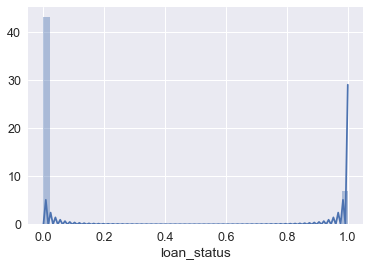

In [239]:
#distribution plot
sns.distplot(loan_df['loan_status'])
plt.show()

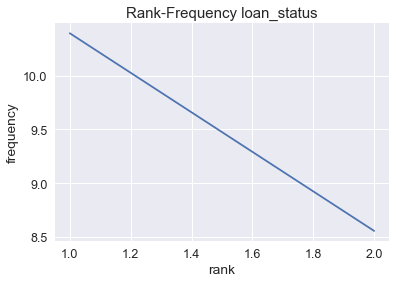

In [240]:
#frequency plot
column = "loan_status"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

In [241]:
#Create a derived column for number of days between earliest credit line opened and loan issued date
#This metric will tell us how old was the borrower's credit history before the loan was issued
#here - earliest_cr_line is - The month the borrower's earliest reported credit line was opened (coneverted to days above)
#and issue_d is - The month which the loan was funded (converted to days above)

loan_df['credit_line_age_on_issue_dt'] = loan_df['earliest_cr_line'] - loan_df['issue_d'] 


In [242]:
loan_df[['credit_line_age_on_issue_dt', 'earliest_cr_line','issue_d']].head() 

,credit_line_age_on_issue_dt,earliest_cr_line,issue_d
0,9830,12360,2530
1,4627,7157,2530
2,3682,6212,2530
3,5782,8312,2530
4,5813,8343,2530


In [243]:
#Create a derived column for number of days between loan issued date and last month payment was received
#This metric will tell us the account age
#here - issue_d is - The month which the loan was funded (converted to days above)
#and last_pymnt_d is - Last month payment was received

loan_df['account_age'] = loan_df['issue_d'] - loan_df['last_pymnt_d'] 

In [244]:
loan_df[['account_age', 'issue_d','last_pymnt_d']].head() 

,account_age,issue_d,last_pymnt_d
0,1127,2530,1403
1,487,2530,2043
2,913,2530,1617
3,1127,2530,1403
4,1613,2530,917


In [245]:
#Determine number of numerical (conitnuous) and categorical variables

numerical_variables = loan_df.dtypes[loan_df.dtypes != "object"].index
print("# of Numerical variables: ", len(numerical_variables))

categorical_variables = loan_df.dtypes[loan_df.dtypes == "object"].index
print("# of Categorical variables: ", len(categorical_variables))

print("# of columns", len(loan_df.columns))

# of Numerical variables:  35
# of Categorical variables:  14
# of columns 49


In [246]:
numerical_variables

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'issue_d', 'loan_status',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'pub_rec_bankruptcies',
       'credit_line_age_on_issue_dt', 'account_age'],
      dtype='object')

In [247]:
numerical_values_array = numerical_variables.get_values()

In [248]:
#Describe statistics of all numerical variables. We will use these statistics for below analysis of numerical variables.
for col in numerical_values_array:
    print("====="+col+"=====")
    print(loan_df[col].describe())

=====id=====
count     37833.00
mean     690017.27
std      202885.95
min       54734.00
25%      521104.00
50%      669340.00
75%      839303.00
max     1077501.00
Name: id, dtype: float64
=====member_id=====
count     37833.00
mean     859792.50
std      254234.47
min       80364.00
25%      673215.00
50%      855613.00
75%     1049074.00
max     1314167.00
Name: member_id, dtype: float64
=====loan_amnt=====
count   37833.00
mean    11328.43
std      7477.27
min       500.00
25%      5600.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64
=====funded_amnt=====
count   37833.00
mean    11050.38
std      7204.88
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64
=====funded_amnt_inv=====
count   37833.00
mean    10618.63
std      7112.90
min         0.00
25%      5000.00
50%      9200.00
75%     14603.06
max     35000.00
Name: funded_amnt_inv, dtype: float64
=====int_rate=====
count  

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


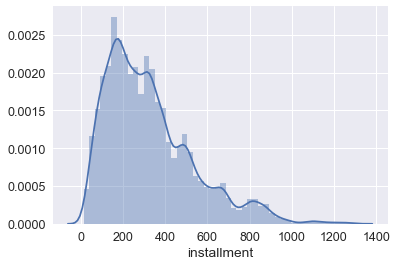

In [249]:
#plot distribution plot for column installment
#installment is - The monthly payment owed by the borrower if the loan originates.

sns.distplot(loan_df['installment'])

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


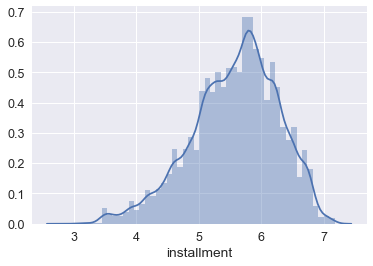

In [250]:
#Since the right tail is long, convert the column values to log
loan_df['installment'] = np.log1p(loan_df['installment'])

sns.distplot(loan_df['installment'])

In [251]:
loan_df['installment'].describe()

count   37833.00
mean        5.58
std         0.69
min         2.84
25%         5.13
50%         5.65
75%         6.08
max         7.17
Name: installment, dtype: float64

In [252]:
#annual_inc is - The self-reported annual income provided by the borrower during registration.

print(loan_df['annual_inc'].quantile(.95))
print(loan_df['annual_inc'].describe())

143700.00000000073
count     37833.00
mean      69672.64
std       63644.64
min        4000.00
25%       41900.00
50%       60000.00
75%       83500.00
max     6000000.00
Name: annual_inc, dtype: float64


C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


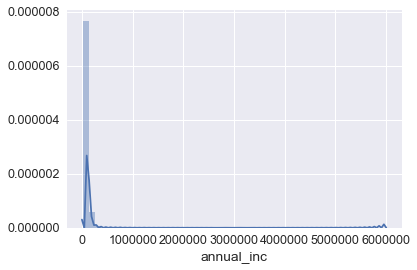

In [253]:
#plot distribution plot for column annual_inc
sns.distplot(loan_df['annual_inc'])

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


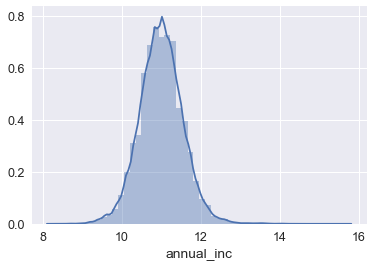

In [254]:
#Since the distribution is not normal, take the log
loan_df['annual_inc'] = np.log1p(loan_df['annual_inc'])

sns.distplot(loan_df['annual_inc'])

In [255]:
#delinq_2yrs is - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

print(loan_df['delinq_2yrs'].describe())
print(loan_df['delinq_2yrs'].quantile(.89))

count   37833.00
mean        0.15
std         0.49
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        11.00
Name: delinq_2yrs, dtype: float64
0.0


In [256]:
#Since .89 quantile value of delinq_2yrs is 0, drop the column

loan_df.drop('delinq_2yrs',axis=1,inplace=True)

25000.0


C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


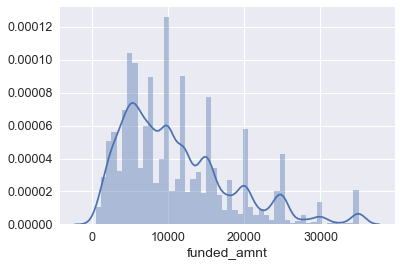

In [257]:
#plot distribution plot for column funded_amnt
#funded_amnt is - The total amount committed to that loan at that point in time.

print(loan_df['funded_amnt'].quantile(.95))
sns.distplot(loan_df['funded_amnt'])

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


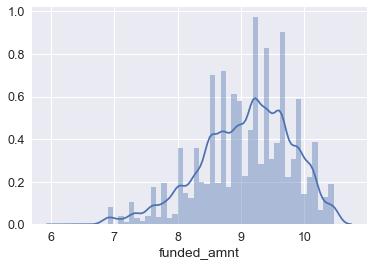

In [258]:
#SInce the distribution is not normal, take the log
loan_df['funded_amnt'] = np.log1p(loan_df['funded_amnt'])

sns.distplot(loan_df['funded_amnt'])

24783.295424


C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


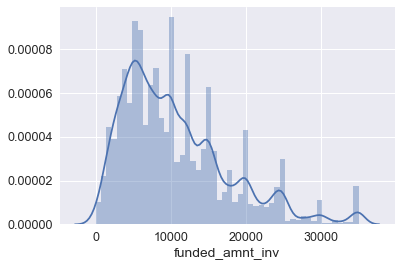

In [259]:
#plot distribution plot for column funded_amnt_inv
#funded_amnt_inv is - The total amount committed by investors for that loan at that point in time.


print(loan_df['funded_amnt_inv'].quantile(.95))
sns.distplot(loan_df['funded_amnt_inv'])

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


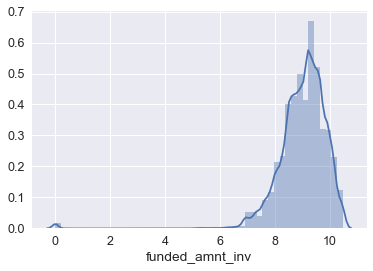

In [260]:
#SInce the distribution is not normal, take the log
loan_df['funded_amnt_inv'] = np.log1p(loan_df['funded_amnt_inv'])

sns.distplot(loan_df['funded_amnt_inv'])

5147.0
count    37833.00
mean      7845.95
std       2576.70
min     -18290.00
25%       6273.00
50%       7461.00
75%       9073.00
max      18173.00
Name: earliest_cr_line, dtype: float64


C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


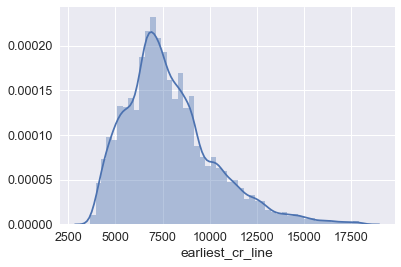

In [261]:
#plot distribution plot for column earliest_cr_line
#earliest_cr_line is - The month the borrower's earliest reported credit line was opened.

print(loan_df['earliest_cr_line'].quantile(.1))
print(loan_df['earliest_cr_line'].describe())

#remove negative values
loan_df = loan_df[loan_df['earliest_cr_line'] >=0.0]
sns.distplot(loan_df['earliest_cr_line'])

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


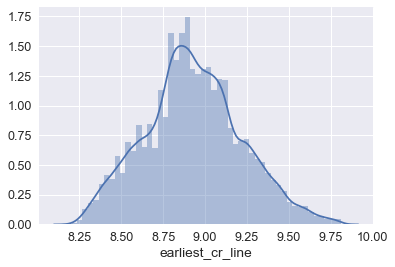

In [262]:
#Since the distribution is not normal, take the log
loan_df['earliest_cr_line'] = np.log1p(loan_df['earliest_cr_line'])

sns.distplot(loan_df['earliest_cr_line'])
plt.show()

2221.0
count   37774.00
mean     4978.67
std      2384.14
min      1095.00
25%      3348.00
50%      4567.00
75%      6178.00
max     15615.00
Name: credit_line_age_on_issue_dt, dtype: float64


C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


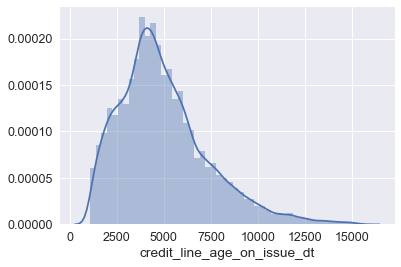

In [263]:
#plot distribution plot for column credit_line_age_on_issue_dt
#credit_line_age_on_issue_dt is a derived column - number of days between earliest credit line opened and loan issued date

print(loan_df['credit_line_age_on_issue_dt'].quantile(.1))
print(loan_df['credit_line_age_on_issue_dt'].describe())

sns.distplot(loan_df['credit_line_age_on_issue_dt'])
plt.show()

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


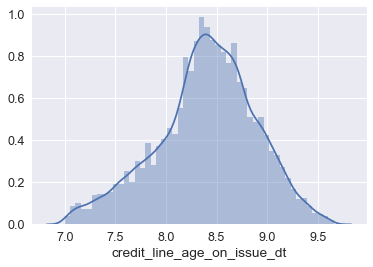

In [264]:
#Since the distribution is not normal(right tail is long), take the log
loan_df['credit_line_age_on_issue_dt'] = np.log1p(loan_df['credit_line_age_on_issue_dt'])

sns.distplot(loan_df['credit_line_age_on_issue_dt'])
plt.show()

274.0
count   37774.00
mean      889.34
std       430.39
min        28.00
25%       550.00
50%       974.00
75%      1126.00
max      2130.00
Name: account_age, dtype: float64


C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


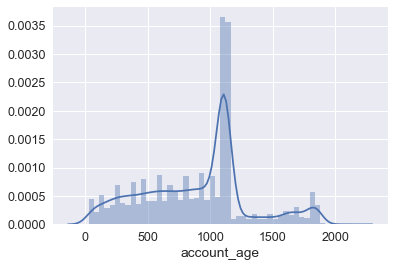

In [265]:
#plot distribution plot for column account_age
#account_age is a derived column for number of days between loan issued date and last month payment was received

print(loan_df['account_age'].quantile(.1))
print(loan_df['account_age'].describe())

sns.distplot(loan_df['account_age'])
plt.show()

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


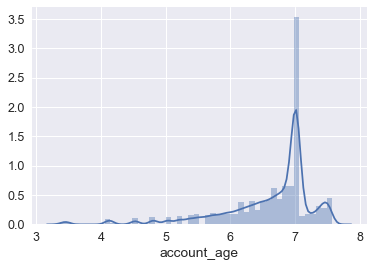

In [266]:
#Since the distribution is not normal(right tail is long), take the log
loan_df['account_age'] = np.log1p(loan_df['account_age'])

sns.distplot(loan_df['account_age'])
plt.show()

3.0
count   37774.00
mean        0.87
std         1.07
min         0.00
25%         0.00
50%         1.00
75%         1.00
max         8.00
Name: inq_last_6mths, dtype: float64


C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


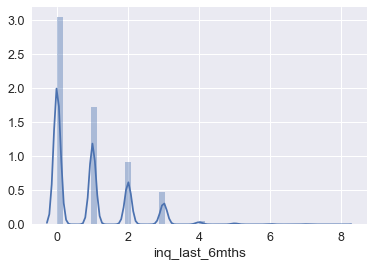

In [267]:
#plot distribution plot for column inq_last_6mths
#inq_last_6mths is - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

print(loan_df['inq_last_6mths'].quantile(.95))
print(loan_df['inq_last_6mths'].describe())
sns.distplot(loan_df['inq_last_6mths'])

In [268]:
loan_df.groupby('inq_last_6mths').id.count()

#Since this column has only 9 unique values, it can be used as a categorical variable too

inq_last_6mths
0    18365
1    10442
2     5540
3     2884
4      301
5      138
6       58
7       33
8       13
Name: id, dtype: int64

0.0
1.0
count   37774.00
mean        0.05
std         0.23
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         4.00
Name: pub_rec, dtype: float64


C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


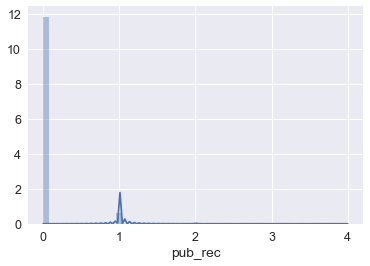

In [269]:
#plot distribution plot for column pub_rec
#pub_rec is - Number of derogatory public records

print(loan_df['pub_rec'].quantile(.94))
print(loan_df['pub_rec'].quantile(.95))
print(loan_df['pub_rec'].describe())
sns.distplot(loan_df['pub_rec'])


In [270]:
#Drop the column as the .95 percentile value is 0.0
loan_df.drop('pub_rec',axis=1,inplace=True)

41699.19999999998
count    37774.00
mean     13466.32
std      15863.11
min          0.00
25%       3791.00
50%       8970.50
75%      17169.50
max     149588.00
Name: revol_bal, dtype: float64


C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


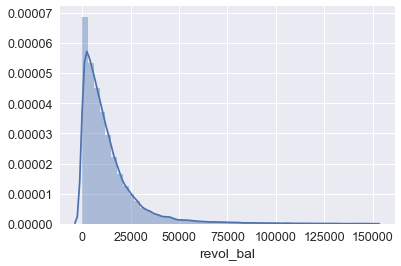

In [271]:
#revol_bal is - Total credit revolving balance

print(loan_df['revol_bal'].quantile(.95))
print(loan_df['revol_bal'].describe())
sns.distplot(loan_df['revol_bal'])


count   37774.00
mean       13.38
std         6.66
min         0.00
25%         8.27
50%        13.47
75%        18.63
max        29.99
Name: dti, dtype: float64


C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


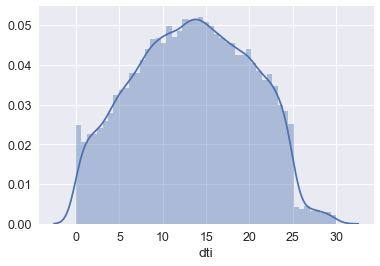

In [272]:
#plot distribution plot for column dti
#dti is - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
#         excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
    

print(loan_df['dti'].describe())
sns.distplot(loan_df['dti'])

In [273]:
#Drop columns which have most of the rows with zero values(we found it in column describe function executed previously above)

#out_prncp - Remaining outstanding principal for total amount funded
#out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors
#total_rec_late_fee - Late fees received to date
#recoveries - post charge off gross recovery
#collection_recovery_fee - post charge off collection fee
#pub_rec_bankruptcies - Number of public record bankruptcies

loan_df.drop('out_prncp',axis=1,inplace=True)
loan_df.drop('out_prncp_inv',axis=1,inplace=True)
loan_df.drop('total_rec_late_fee',axis=1,inplace=True)
loan_df.drop('recoveries',axis=1,inplace=True)
loan_df.drop('collection_recovery_fee',axis=1,inplace=True)
loan_df.drop('pub_rec_bankruptcies',axis=1,inplace=True)


In [274]:
#Drop policy_code as most of the rows have value 1 (we found it in column describe function executed previously above)
#policy_code - publicly available policy_code=1, new products not publicly available policy_code=2

loan_df.drop('policy_code',axis=1,inplace=True)


24999.99
count   37774.00
mean     9910.74
std      7085.77
min         0.00
25%      4800.00
50%      8000.01
75%     14000.00
max     35000.02
Name: total_rec_prncp, dtype: float64


C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


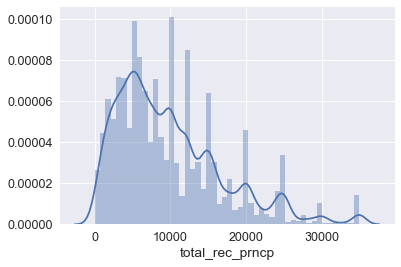

In [275]:
#plot distribution plot for column total_rec_prncp
##total_rec_prncp is - Principal received to date

print(loan_df['total_rec_prncp'].quantile(.95))
print(loan_df['total_rec_prncp'].describe())
sns.distplot(loan_df['total_rec_prncp'])

C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


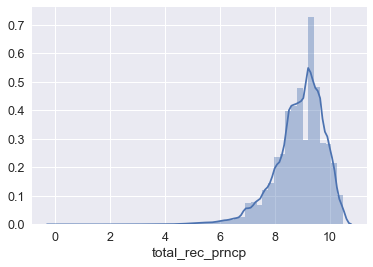

In [276]:
#Since the distribution is not normal, take the log
loan_df['total_rec_prncp'] = np.log1p(loan_df['total_rec_prncp'])

sns.distplot(loan_df['total_rec_prncp'])
plt.show()

7655.253499999995
count   37774.00
mean     2300.94
std      2631.69
min         6.22
25%       677.11
50%      1376.16
75%      2888.36
max     23563.68
Name: total_rec_int, dtype: float64


C:\Users\ragarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


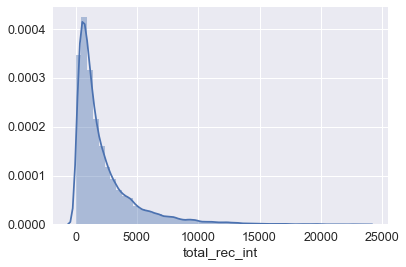

In [277]:
#total_rec_int is - Interest received to date

print(loan_df['total_rec_int'].quantile(.95))
print(loan_df['total_rec_int'].describe())
sns.distplot(loan_df['total_rec_int'])

In [278]:
#Determine number numerical (conitnuous) and categorical variables again

numerical_variables = loan_df.dtypes[loan_df.dtypes != "object"].index
print("# of Numerical variables: ", len(numerical_variables))

categorical_variables = loan_df.dtypes[loan_df.dtypes == "object"].index
print("# of Categorical variables: ", len(categorical_variables))

print("# of columns", len(loan_df.columns))

numerical_values_array = numerical_variables.get_values()
catergorical_values_array = categorical_variables.get_values()

# of Numerical variables:  26
# of Categorical variables:  14
# of columns 40


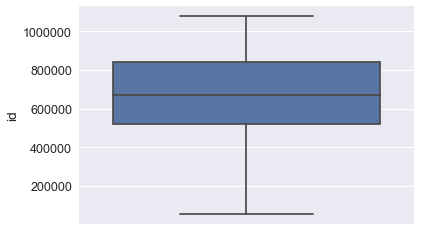

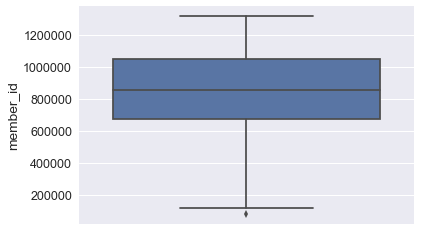

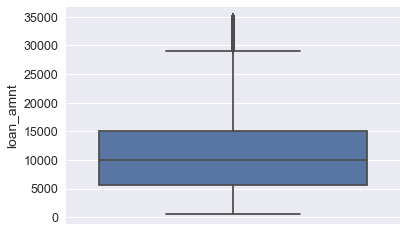

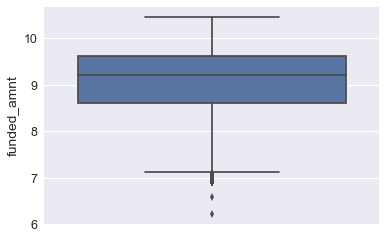

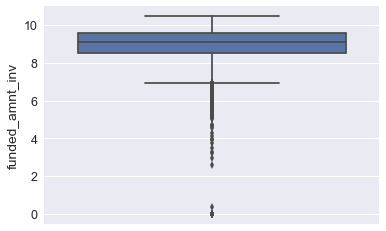

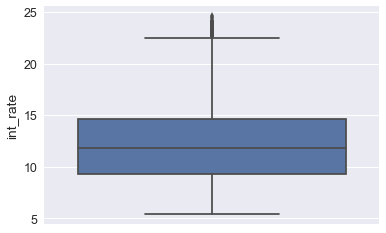

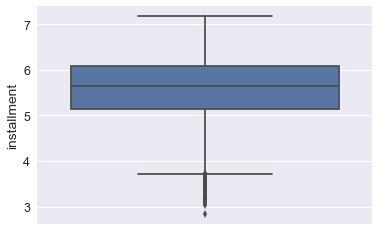

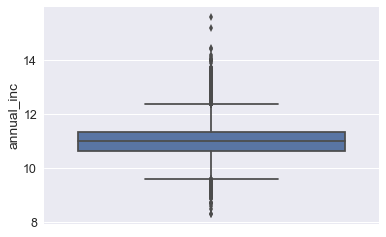

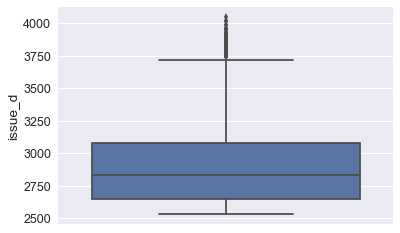

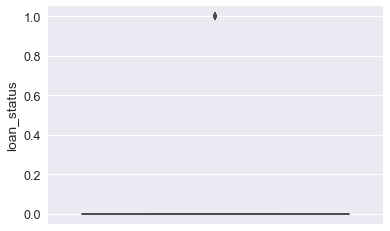

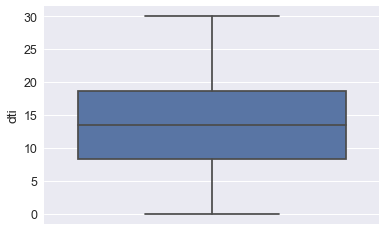

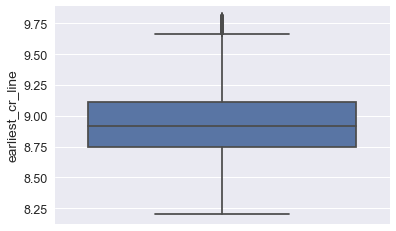

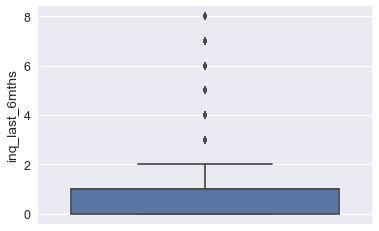

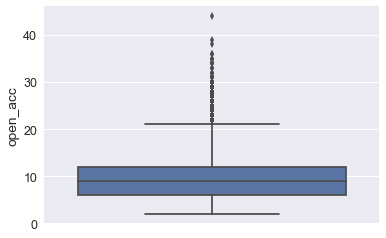

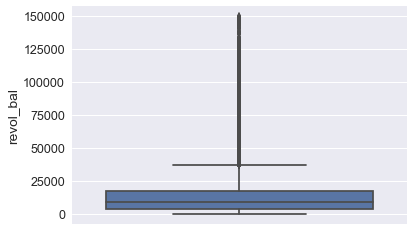

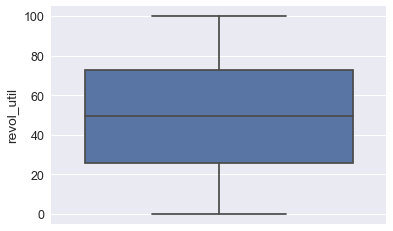

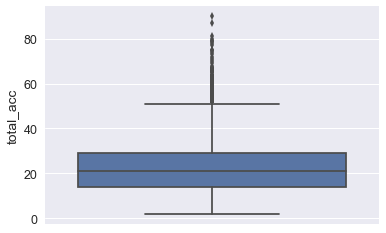

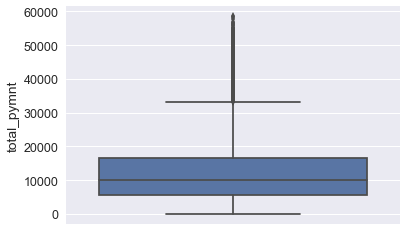

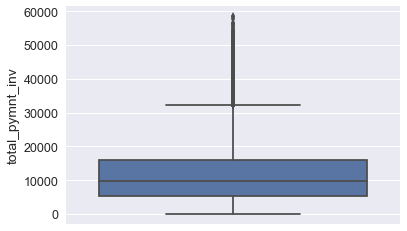

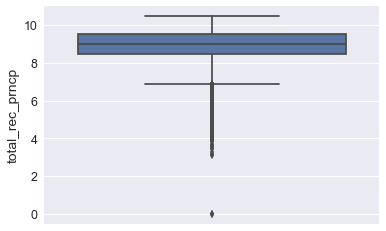

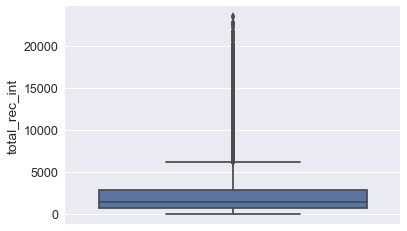

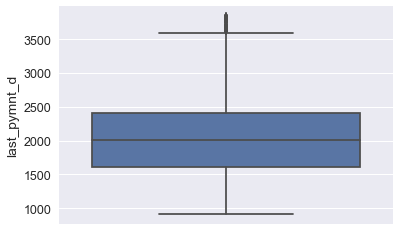

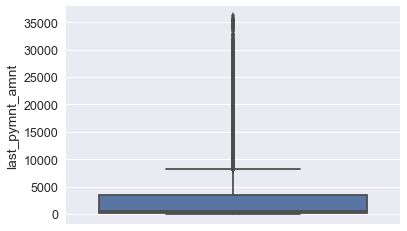

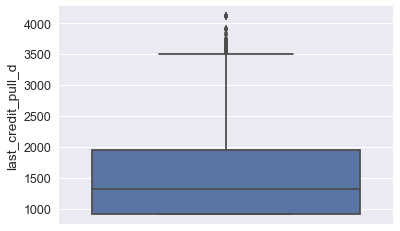

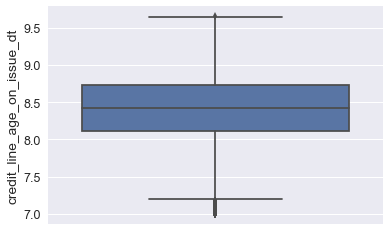

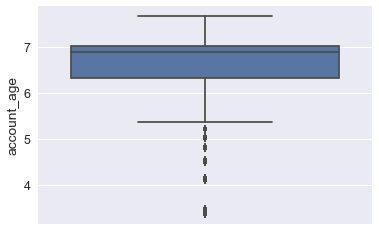

In [279]:
#Create Boxplots for all conitnuous variables

for col in numerical_values_array:
    sns.boxplot(y=loan_df[col])
    plt.show()

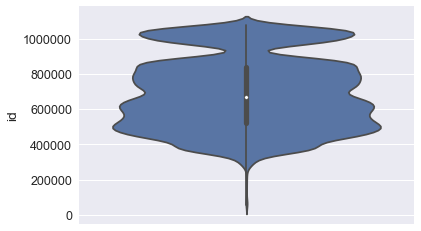

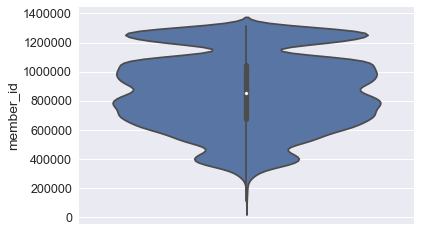

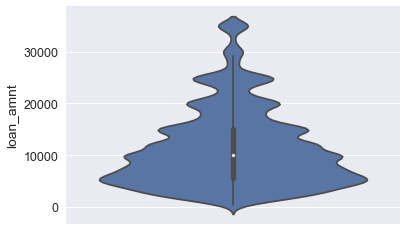

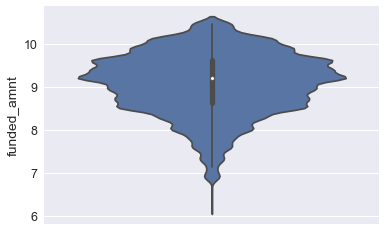

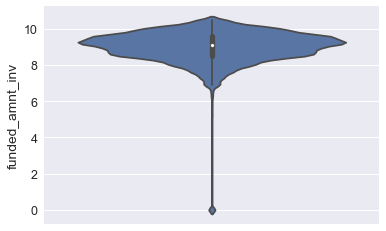

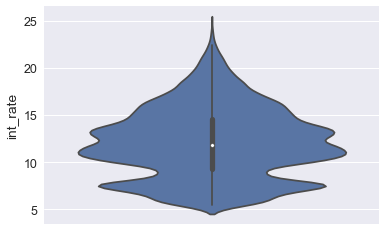

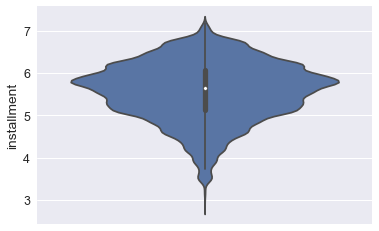

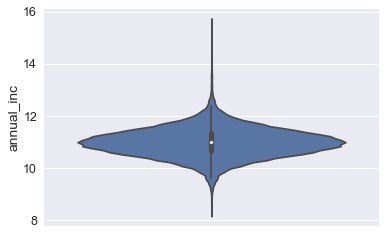

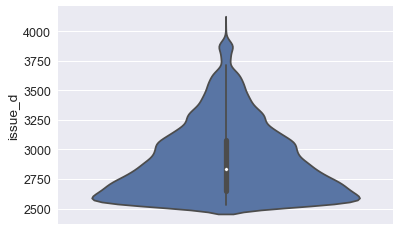

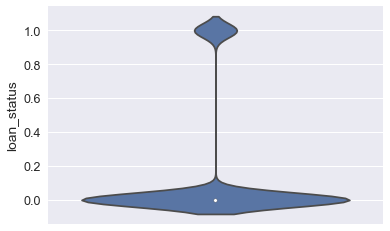

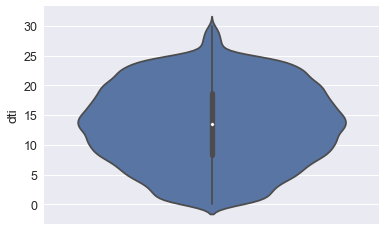

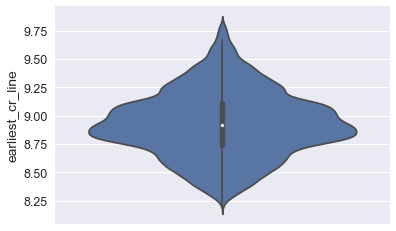

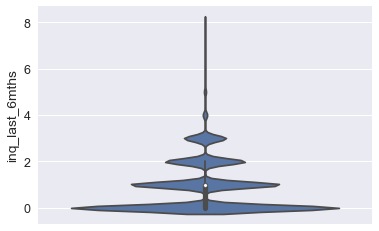

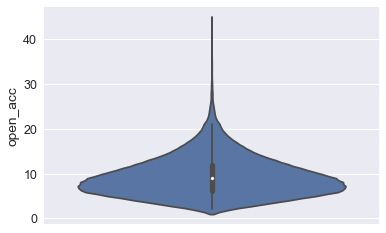

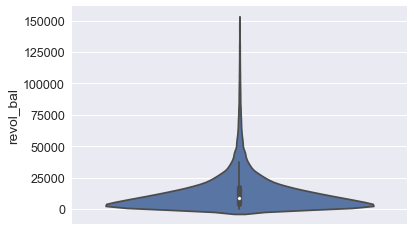

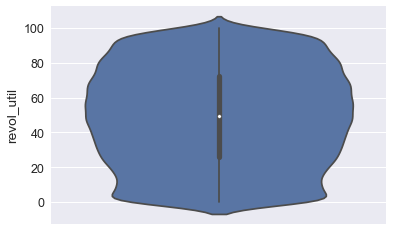

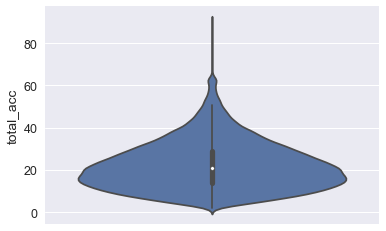

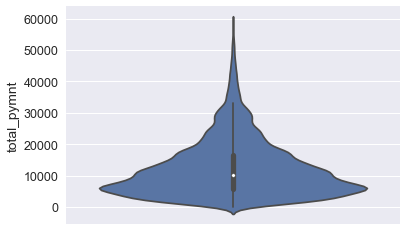

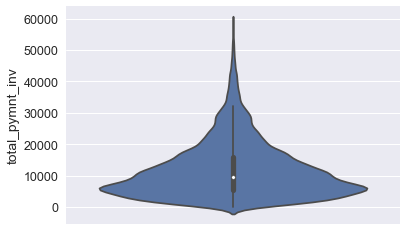

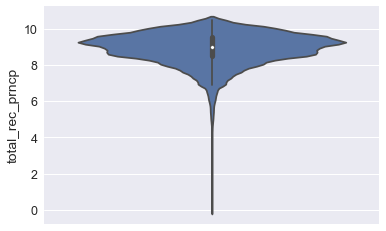

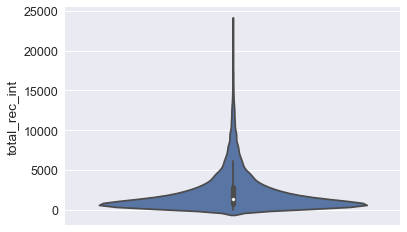

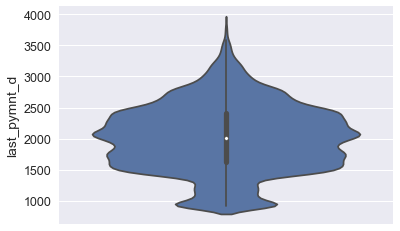

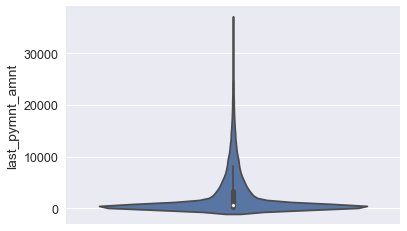

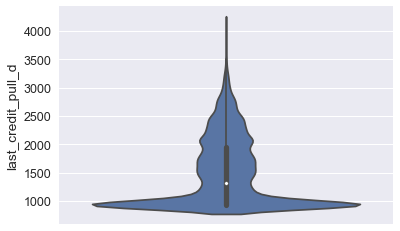

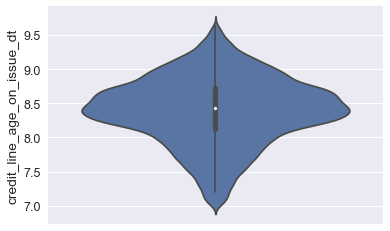

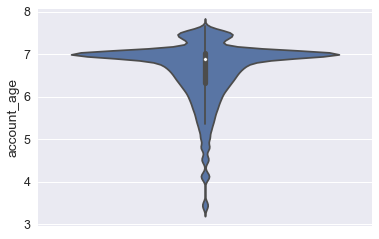

In [280]:
#Create violinplots for all conitnuous variables

for col in numerical_values_array:
    sns.violinplot(y=loan_df[col])
    plt.show()

### Checkpoint 3
### Univariate analysis - Catergorical variables

In [281]:
catergorical_values_array

array(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'initial_list_status',
       'application_type'], dtype=object)

In [282]:
#Append inq_last_6mths to the catergorical_values_array as we want to analyse this variable as a categorical one too

catergorical_values_array = np.append(catergorical_values_array,'inq_last_6mths')

In [283]:
catergorical_values_array

array(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'initial_list_status',
       'application_type', 'inq_last_6mths'], dtype=object)

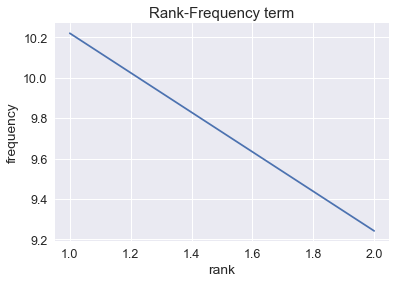

In [284]:
#plot rank frequency plot for column term
#term is - The number of payments on the loan. Values are in months and can be either 36 or 60.

column = "term"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

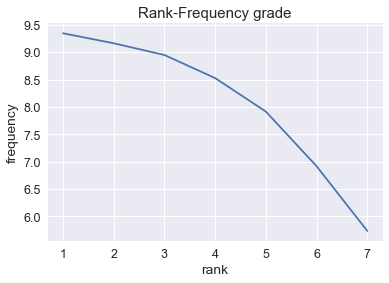

In [285]:
#plot rank frequency plot for column grade
#grade is - LC assigned loan grade

column = "grade"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

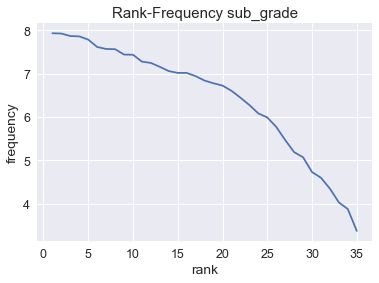

In [286]:
#plot rank frequency plot for column sub_grade
#sub_grade is - LC assigned loan subgrade

column = "sub_grade"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

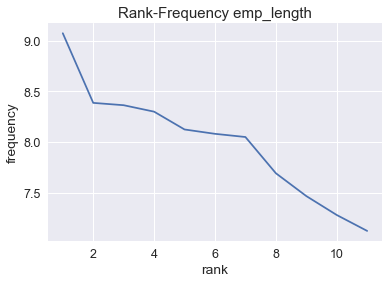

In [287]:
#plot rank frequency plot for column emp_length
#emp_length is - Employment length in years. Possible values are between 0 and 10 
#                where 0 means less than one year and 10 means ten or more years. 


column = "emp_length"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

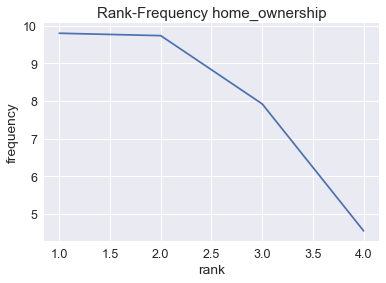

In [288]:
#plot rank frequency plot for column home_ownership
#home_ownership is - The home ownership status provided by the borrower during registration. 
#                    Our values are: RENT, OWN, MORTGAGE, OTHER.

column = "home_ownership"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

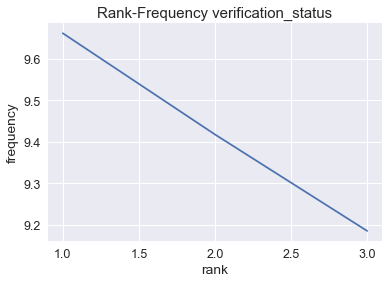

In [289]:
#plot rank frequency plot for column verification_status
#verification_status is - Indicates if income was verified by LC, not verified, or if the income source was verified

column = "verification_status"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

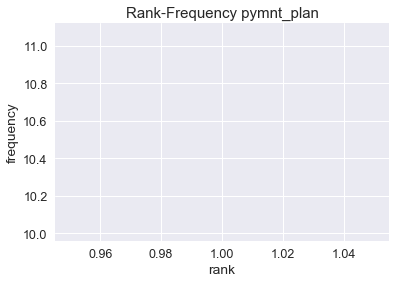

In [290]:
#plot rank frequency plot for column pymnt_plan
#pymnt_plan is - Indicates if a payment plan has been put in place for the loan

column = "pymnt_plan"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

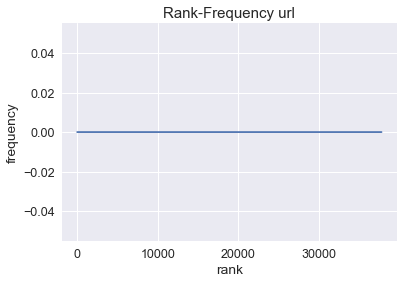

In [291]:
#plot rank frequency plot for column url
#url is - URL for the LC page with listing data.

column = "url"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

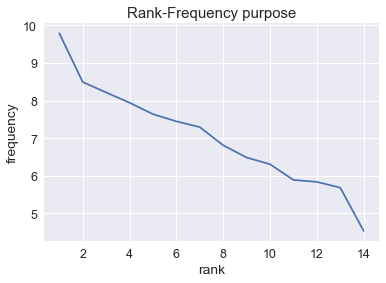

In [292]:
#plot rank frequency plot for column purpose
#purpose is - A category provided by the borrower for the loan request. 

column = "purpose"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

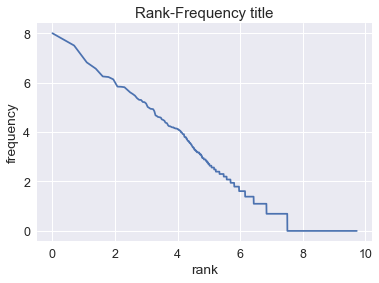

In [295]:
#plot rank frequency plot for column title
#title is - The loan title provided by the borrower. 

column = "title"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
#Change it to log log frequency rank graph as the log frequency rank graph was not a striaght line 
x = list(np.log(range(1,len(frame["type"])+1)))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

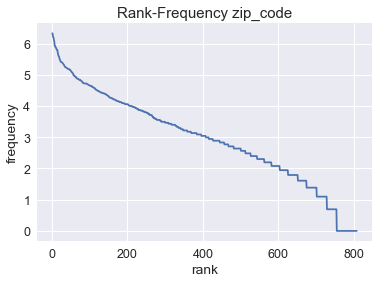

In [296]:
#plot rank frequency plot for column zip_code
#zip_code is - The first 3 numbers of the zip code provided by the borrower in the loan application. 

column = "zip_code"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

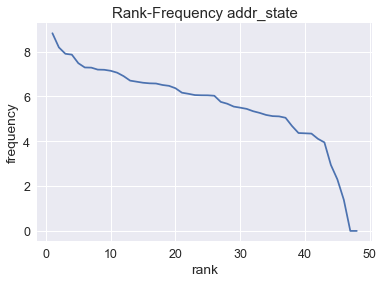

In [297]:
#plot rank frequency plot for column addr_state
#addr_state is - The state provided by the borrower in the loan application. 

column = "addr_state"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

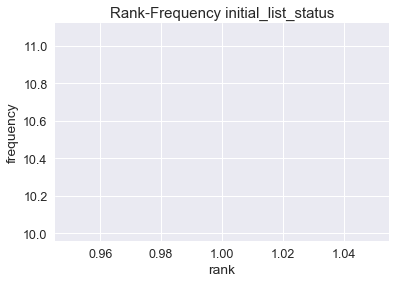

In [298]:
#plot rank frequency plot for column initial_list_status
#initial_list_status is - The initial listing status of the loan. Possible values are – W, F.

column = "initial_list_status"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

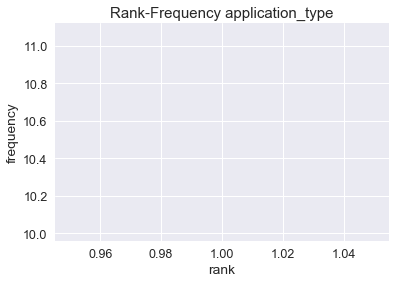

In [299]:
#plot rank frequency plot for column application_type
#application_type is - Indicates whether the loan is an individual application or a joint application with two co-borrowers.

column = "application_type"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

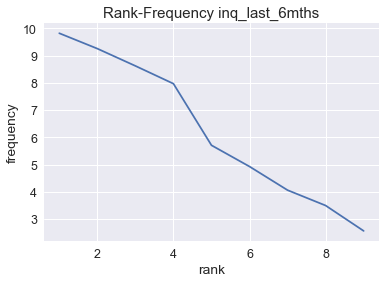

In [300]:
#plot rank frequency plot for column inq_last_6mths
#inq_last_6mths is - The number of inquiries in past 6 months (excluding auto and mortgage inquiries).

column = "inq_last_6mths"
frame = pd.DataFrame(loan_df[column].value_counts()).reset_index()
frame.columns.values[0] = "type"
y = np.log(np.array(frame[column]))
x = list(range(1,len(frame["type"])+1))
plt.xlabel("rank")
plt.ylabel("frequency")
plt.title("Rank-Frequency "+column)
plt.plot(x,y)

In [301]:
#Segmented Univariate analysis
for col in catergorical_values_array:
    print(loan_df.groupby(col)['id'].count())
    print("==========================================================================")

term
 36 months    27454
 60 months    10320
Name: id, dtype: int64
grade
A     9531
B    11446
C     7694
D     5047
E     2738
F     1009
G      309
Name: id, dtype: int64
sub_grade
A1    1036
A2    1406
A3    1699
A4    2772
A5    2618
B1    1706
B2    1941
B3    2792
B4    2410
B5    2597
C1    2033
C2    1931
C3    1449
C4    1164
C5    1117
D1     878
D2    1285
D3    1116
D4     935
D5     833
E1     739
E2     630
E3     532
E4     438
E5     399
F1     321
F2     237
F3     179
F4     159
F5     113
G1      99
G2      77
G3      48
G4      56
G5      29
Name: id, dtype: int64
emp_length
0     4386
1     3130
10    8730
2     4286
3     4021
4     3372
5     3230
6     2188
7     1746
8     1448
9     1237
Name: id, dtype: int64
home_ownership
MORTGAGE    16902
OTHER          95
OWN          2763
RENT        18014
Name: id, dtype: int64
verification_status
Not Verified       15715
Source Verified     9751
Verified           12308
Name: id, dtype: int64
pymnt_plan
n    37774
Nam

In [302]:
#Drop below categorical columns as they have either too many values or not useful for the analysis

loan_df.drop('pymnt_plan',axis=1,inplace=True)
loan_df.drop('url',axis=1,inplace=True)
loan_df.drop('title',axis=1,inplace=True)
loan_df.drop('initial_list_status',axis=1,inplace=True)
loan_df.drop('application_type',axis=1,inplace=True)
loan_df.drop('zip_code',axis=1,inplace=True)
loan_df.drop('sub_grade',axis=1,inplace=True)


In [303]:
#Determine number numerical (conitnuous) and categorical variables again

numerical_variables = loan_df.dtypes[loan_df.dtypes != "object"].index
print("# of Numerical variables: ", len(numerical_variables))

categorical_variables = loan_df.dtypes[loan_df.dtypes == "object"].index
print("# of Categorical variables: ", len(categorical_variables))

print("# of columns", len(loan_df.columns))

numerical_values_array = numerical_variables.get_values()
catergorical_values_array = categorical_variables.get_values()

# of Numerical variables:  26
# of Categorical variables:  7
# of columns 33


In [304]:
#Append inq_last_6mths to the catergorical_values_array as we want to analyse this variable as a categorical one too

catergorical_values_array = np.append(catergorical_values_array,'inq_last_6mths')

In [305]:
for col in catergorical_values_array:
    print(loan_df.groupby(col)['id'].count())
    print("==========================================================================")

term
 36 months    27454
 60 months    10320
Name: id, dtype: int64
grade
A     9531
B    11446
C     7694
D     5047
E     2738
F     1009
G      309
Name: id, dtype: int64
emp_length
0     4386
1     3130
10    8730
2     4286
3     4021
4     3372
5     3230
6     2188
7     1746
8     1448
9     1237
Name: id, dtype: int64
home_ownership
MORTGAGE    16902
OTHER          95
OWN          2763
RENT        18014
Name: id, dtype: int64
verification_status
Not Verified       15715
Source Verified     9751
Verified           12308
Name: id, dtype: int64
purpose
car                    1474
credit_card            4888
debt_consolidation    17893
educational             294
home_improvement       2817
house                   361
major_purchase         2079
medical                 656
moving                  548
other                  3704
renewable_energy         93
small_business         1716
vacation                343
wedding                 908
Name: id, dtype: int64
addr_state
AK      7

In [306]:
#create pivot tables against loan_status mean. Higher mean denotes higher laon default probability
for col in catergorical_values_array:
    print(pd.pivot_table(data=loan_df,index=col,values='loan_status',aggfunc=np.mean).sort_values(by='loan_status'
                                                                                                  ,ascending=False))
    
    

            loan_status
term                   
 60 months         0.22
 36 months         0.11
       loan_status
grade             
G             0.31
F             0.30
E             0.25
D             0.20
C             0.16
B             0.11
A             0.06
            loan_status
emp_length             
10                 0.15
7                  0.15
1                  0.14
5                  0.14
0                  0.14
6                  0.14
8                  0.14
3                  0.13
4                  0.13
2                  0.13
9                  0.12
                loan_status
home_ownership             
OTHER                  0.19
RENT                   0.15
OWN                    0.14
MORTGAGE               0.13
                     loan_status
verification_status             
Verified                    0.16
Source Verified             0.14
Not Verified                0.12
                    loan_status
purpose                        
small_business          

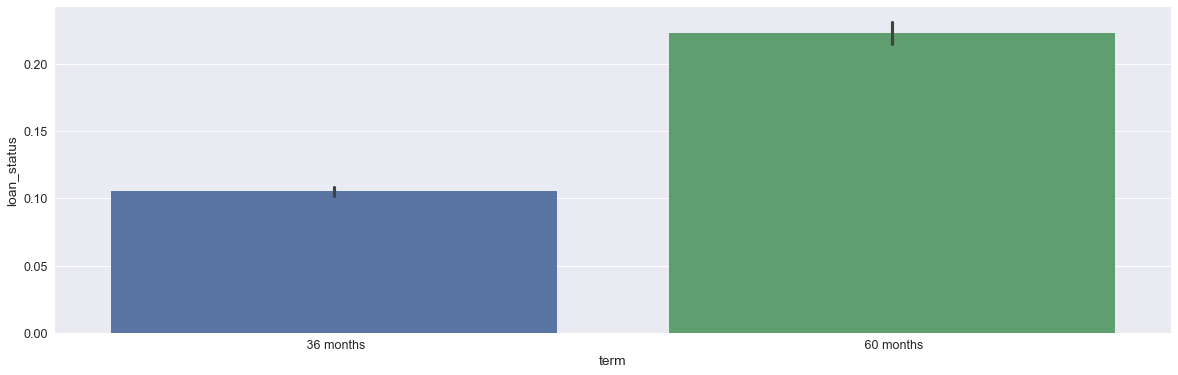

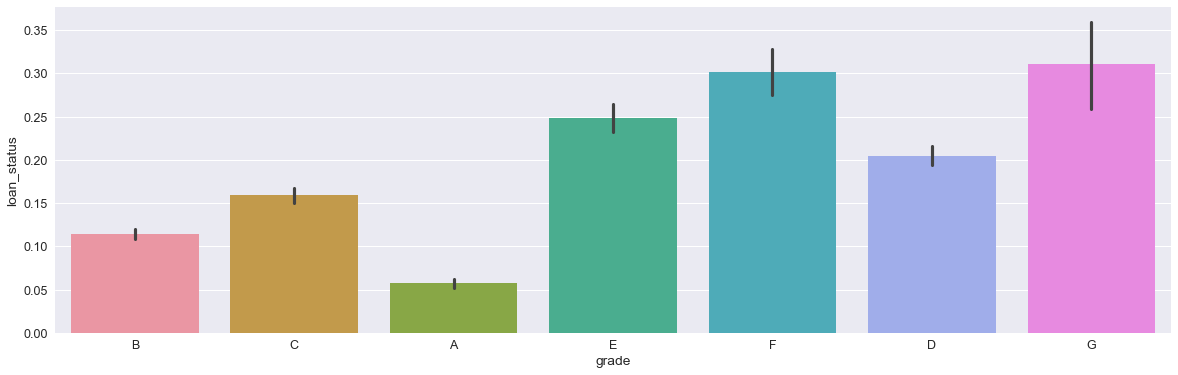

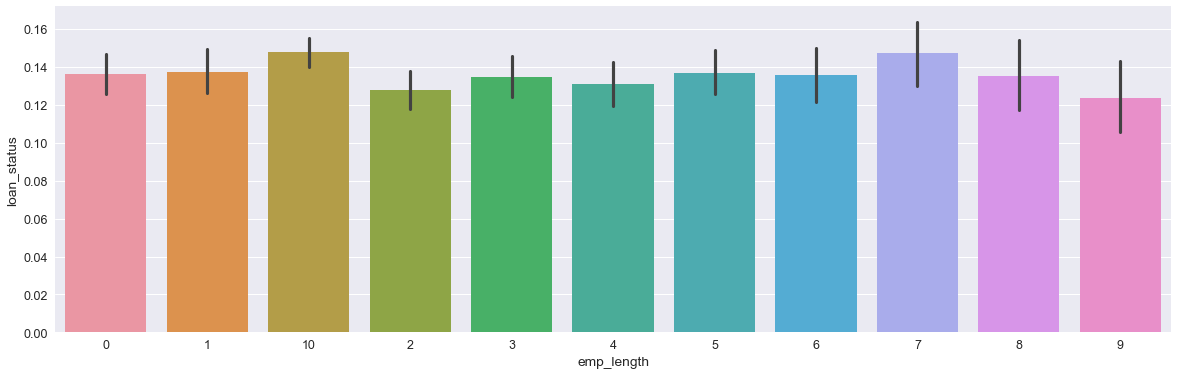

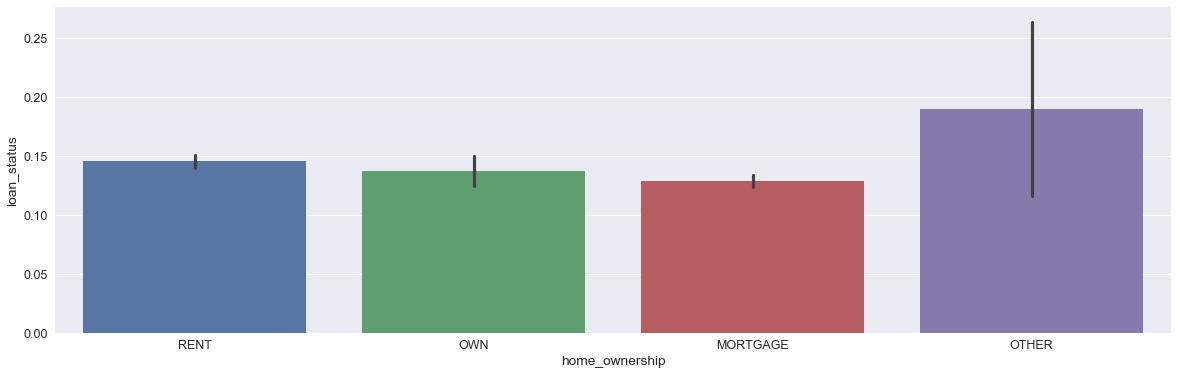

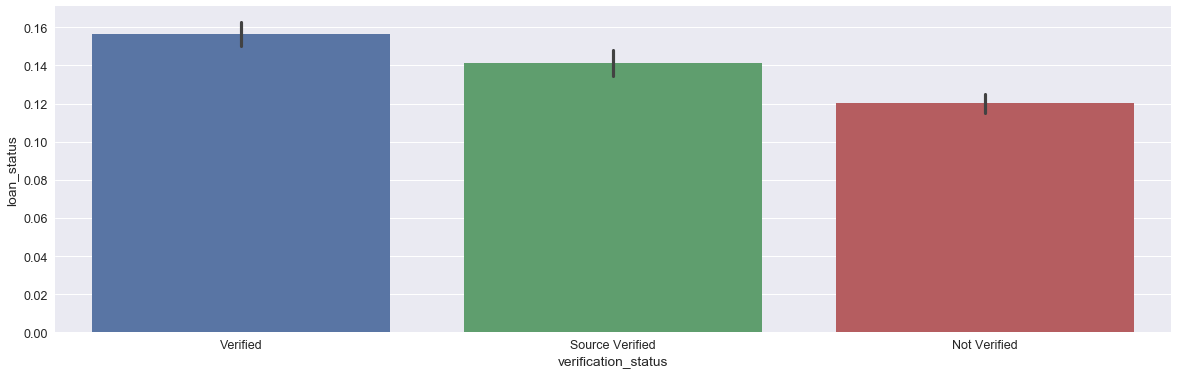

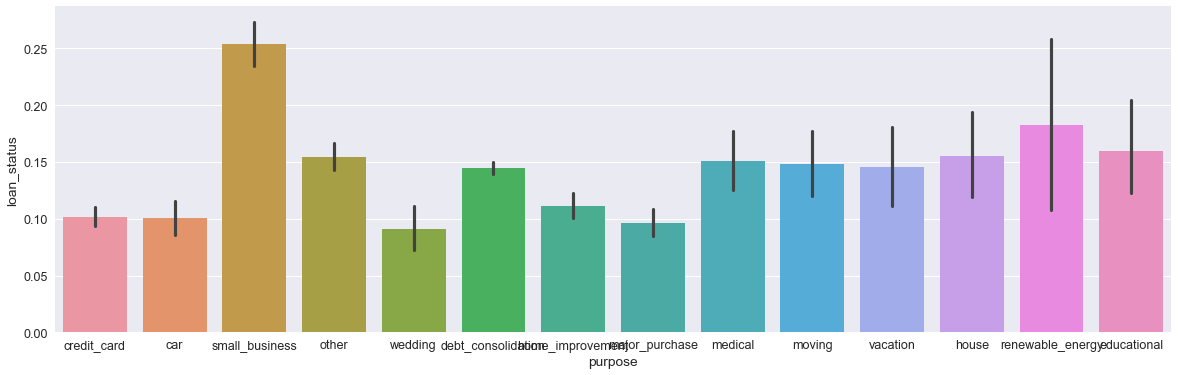

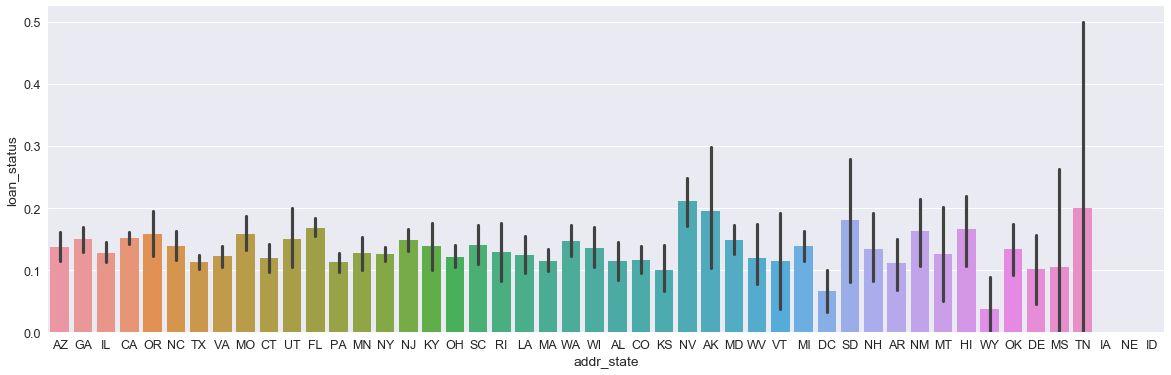

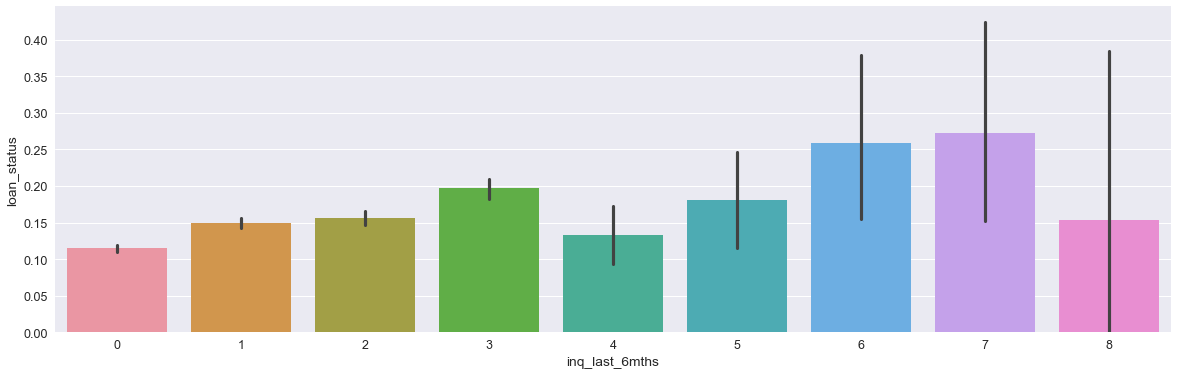

In [307]:
for col in catergorical_values_array:
    plt.figure(figsize=(20, 6))
    sns.barplot(x=col,y='loan_status',estimator=np.mean,data=loan_df)

    plt.show()
    

### Driver categorical variables for the loan default

### term ->
#### loan defaulters for 60 months loan -> 22%
#### loan defaulters for 36 months loan -> 11%

##### 60 Months loans have higher probabilty to get defaulted

### grade ->
#### loan defaulters for grade G loan -> 31%
#### loan defaulters for grade F loan -> 30%
#### loan defaulters for grade E loan -> 25%
#### loan defaulters for grade D loan -> 20%
#### loan defaulters for grade C loan -> 16%
#### loan defaulters for grade B loan -> 11%
#### loan defaulters for grade A loan -> 6%

##### Grade G loan has the highest probability to get defaulted, grade A loan has the lowest probability to get defaulted  

### purpose ->
#### loan defaulters for 'small business' loans -> 25%
#### loan defaulters for 'renewable_energy' loans -> 18%
#### loan defaulters for 'educational' and 'house' loans -> 16%
#### loan defaulters for 'wedding' loans -> 9%

##### 'small business' loan has the highest probability to get defaulted, 'wedding' loan has the lowest probability to get defaulted  

### addr_state->
#### loan defaulters from state 'NV' -> 21%
#### loan defaulters from state 'TN' -> 20%
#### loan defaulters from state 'AK' -> 19%

##### States with highest rate of defaulters - 'NV', 'TN', 'AK'; States with lowest rate of  defaulters 'NE', ID', 'IA'

### inq_last_6mths ->
##### Borrowers having inquires between 5-8 have higher probability to default (Used median values)

### Checkpoint 4
### Bivariate Analysis - Continuous Variables

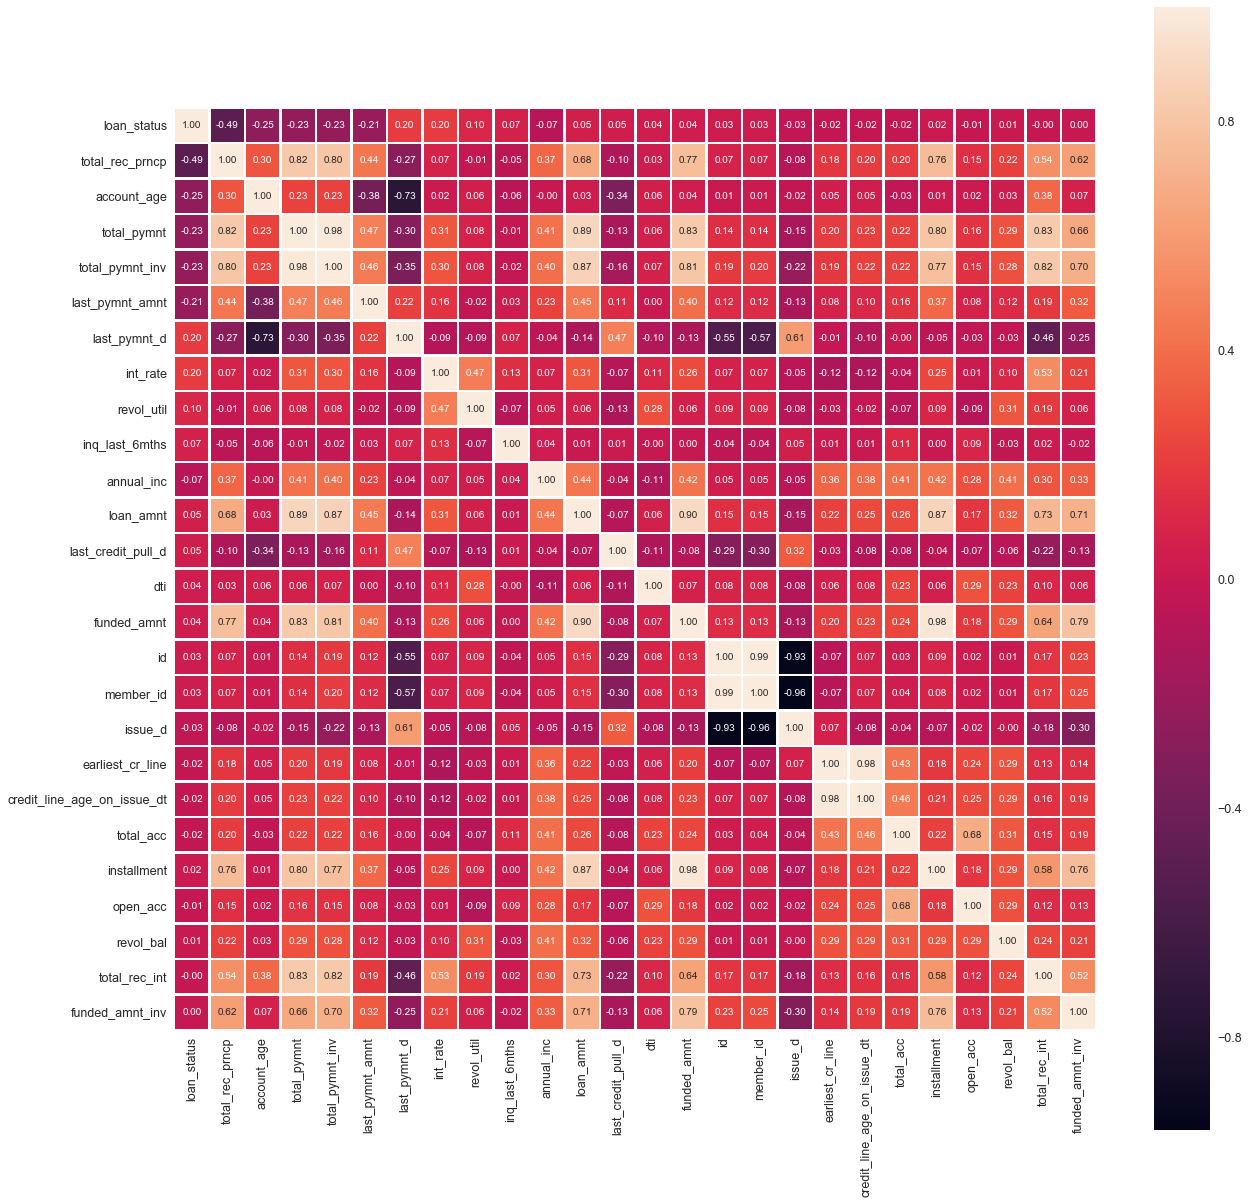

In [308]:
##Create correlation heatmap
corr = loan_df[numerical_values_array].corr()
corr_abs = corr.abs()
cols = corr_abs.nlargest(len(numerical_values_array), 'loan_status')['loan_status'].index
cm = np.corrcoef(loan_df[cols].values.T)

plt.figure(figsize=(len(numerial_values_array)/1.5, len(numerial_values_array)/1.5))
sns.set(font_scale=1.25)
sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
plt.show()

##The positive corelation coefficients denote high probability of loan charge-off

### Continuous Variables with strongest negative correlation with loan default (where loan_status:0=Not default,1=Default):

#### total_rec_prncp -> -0.49
#### account_age -> -0.25
#### total_pymnt and total_pymnt_inv ->-0.23
#### last_pymnt_amnt -> -0.21

### Continuous Variables with strongest positive correlation with loan default (where loan_status:0=Not default,1=Default):

#### last_paymnt_d -> 0.20 (this variable should be ignored as we can't use absolute dates for correlation. We used this variable to derive the account_age column)
#### int_rate -> 0.20
#### revol_util -> 0.10

### Other important bivariate correlations:
#### total_pymnt and total_pymnt_inv have correlation coeff value 0.98, so one variable can be ignored
#### total_recv_prncp has strong correlation with total_pymnt, total_pymnt_inv, funded_amnt and installment variables
#### total_pymnt and total_pymnt_inv have strong correlation with loan_amnt, funded_amnt, installment and total_rec_int variables
#### int_rate has strong correlation with revol_util and total_rec_int variables
#### dti has strong correlation with open_acc, revol_util, revol_bal, total_acc, int_rate variables
#### funded_amnt has strong correlation with loan_amnt, installment, total_pymnt, total_pymnt_inv, funded_amnt_inv, total_recv_prncp, annual_inc, total_recv_int



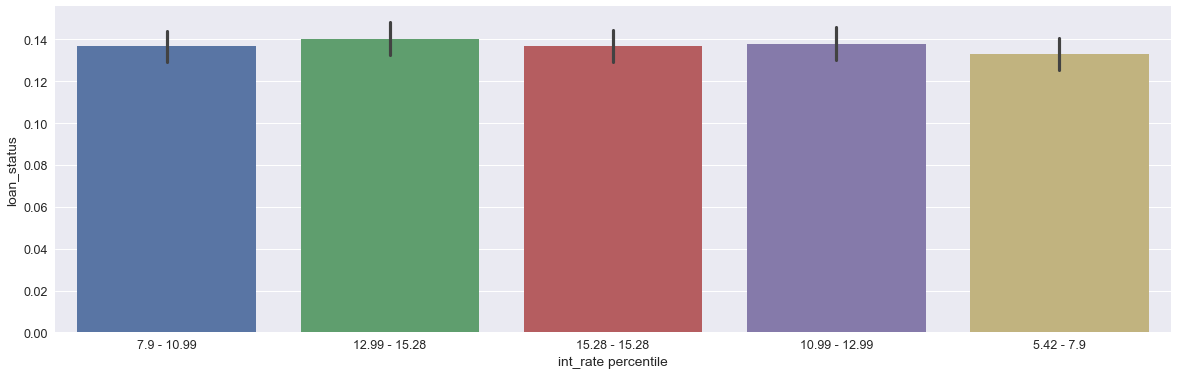

In [313]:
#Categorize int_rate into 5 quantiles to do segmented univariate analysis against loan_status
col = "int_rate"
minimum = round(min(loan_df[col]),2)
p1 = np.percentile(loan_df[col],20).round(2)
p2 = np.percentile(loan_df[col],40).round(2)
p3 = np.percentile(loan_df[col],60).round(2)
p4 = np.percentile(loan_df[col],80).round(2)
maximum = round(max(loan_df[col]),2)
values = [minimum,p1,p2,p3,p4,p4]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col][i] >= minimum and loan_df[col][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col][i] > p1 and loan_df[col][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col][i] > p2 and loan_df[col][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col][i] > p3 and loan_df[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]

name = col+" "+"percentile"        
loan_df[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))

sns.barplot(x=name,y='loan_status',estimator=np.mean,data=loan_df)

#### In general, higher interest rates are resulting in higher defaults

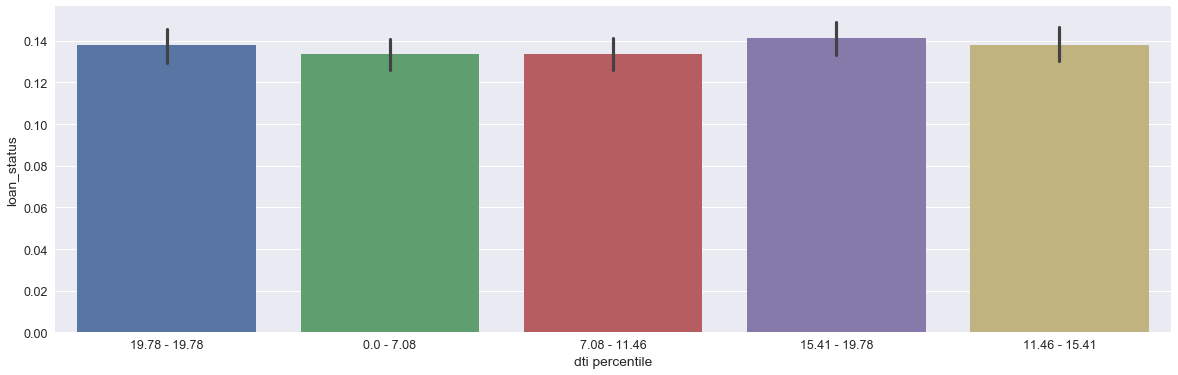

In [314]:
#Categorize dti into 5 quantiles to do segmented univariate analysis against loan_status
col = "dti"
minimum = round(min(loan_df[col]),2)
p1 = np.percentile(loan_df[col],20).round(2)
p2 = np.percentile(loan_df[col],40).round(2)
p3 = np.percentile(loan_df[col],60).round(2)
p4 = np.percentile(loan_df[col],80).round(2)
maximum = round(max(loan_df[col]),2)
values = [minimum,p1,p2,p3,p4,p4]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col][i] >= minimum and loan_df[col][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col][i] > p1 and loan_df[col][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col][i] > p2 and loan_df[col][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col][i] > p3 and loan_df[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]

name = col+" "+"percentile"        
loan_df[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))

sns.barplot(x=name,y='loan_status',estimator=np.mean,data=loan_df)

### In general, higher dti is resulting in higher default rates

### Checkpoint 5
### Bivariate Analysis - Categorical Variables

In [316]:
#Bivariate analysis of term and grade against loan_status
loan_df.pivot_table(values='loan_status', index=['term','grade'], aggfunc='mean').sort_values(
                                                                by=['term','loan_status'], ascending=False)

loan_status
term       grade             
 60 months F             0.31
           G             0.29
           E             0.27
           D             0.26
           C             0.21
           B             0.16
           A             0.08
 36 months G             0.39
           F             0.25
           E             0.19
           D             0.17
           C             0.14
           B             0.10
           A             0.06

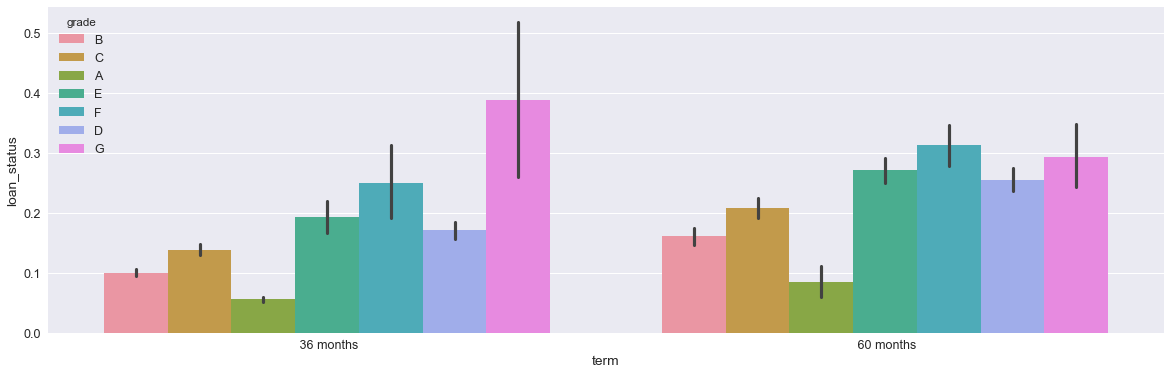

In [317]:
#Draw the barplot
plt.figure(figsize=(20, 6))
sns.barplot(x='term',y='loan_status',hue='grade',estimator=np.mean,data=loan_df)

#### 36 Months term has most defaulters in the grade G loan.
#### 60 Months term has most defaulters in the grade F loan.

In [318]:
#Bivariate analysis of term and purpose against loan_status
loan_df.pivot_table(values='loan_status', index=['term','purpose'], aggfunc='mean').sort_values(
                                                                by=['term','loan_status'], ascending=False)

loan_status
term       purpose                        
 60 months educational                0.43
           small_business             0.35
           vacation                   0.25
           house                      0.25
           other                      0.25
           debt_consolidation         0.23
           medical                    0.21
           credit_card                0.21
           renewable_energy           0.20
           major_purchase             0.19
           moving                     0.18
           wedding                    0.16
           home_improvement           0.16
           car                        0.14
 36 months small_business             0.21
           renewable_energy           0.18
           educational                0.15
           moving                     0.14
           medical                    0.13
           other                      0.13
           vacation                   0.12
           house                      0.11
           debt_consolidation         0.11
           home_improvement           0.09
           car                        0.08
           credit_card                0.07
           major_purchase             0.07
           wedding                    0.07

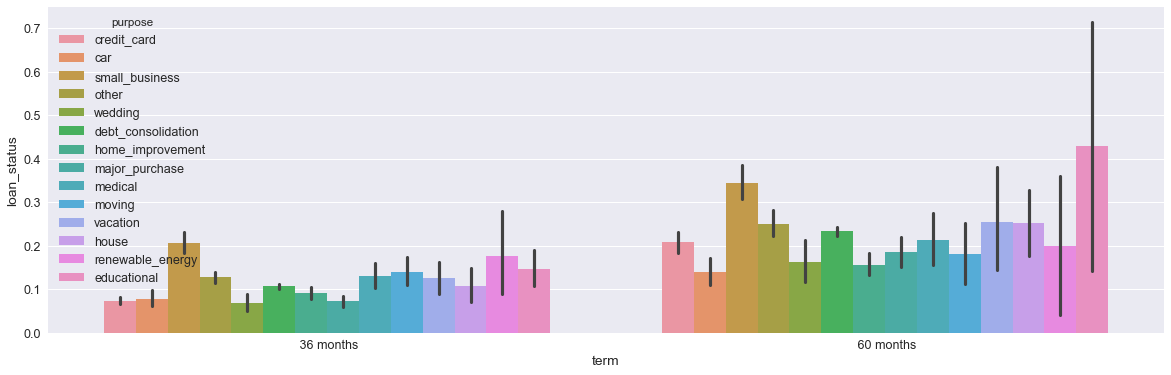

In [319]:
#Draw the barplot
plt.figure(figsize=(20, 6))
sns.barplot(x='term',y='loan_status',hue='purpose',estimator=np.mean,data=loan_df)

#### 36 Months loan has the most defaulters in 'small_business' category, followed by 'renewable_energy'.
#### 60 Months loan has the most defaulters in 'educational_loan' category, followed by 'small_business'.

In [320]:
#Bivariate analysis of term and three states with the highest loan default rates against loan_status
loan_df[(loan_df.addr_state == 'NV')| (loan_df.addr_state == 'TN')| (loan_df.addr_state == 'AK')].pivot_table(
                                values='loan_status', index=['term','addr_state'], aggfunc='mean').sort_values(
                                                                by=['term','loan_status'], ascending=False)

loan_status
term       addr_state             
 60 months NV                 0.28
           AK                 0.25
 36 months TN                 0.20
           NV                 0.18
           AK                 0.17

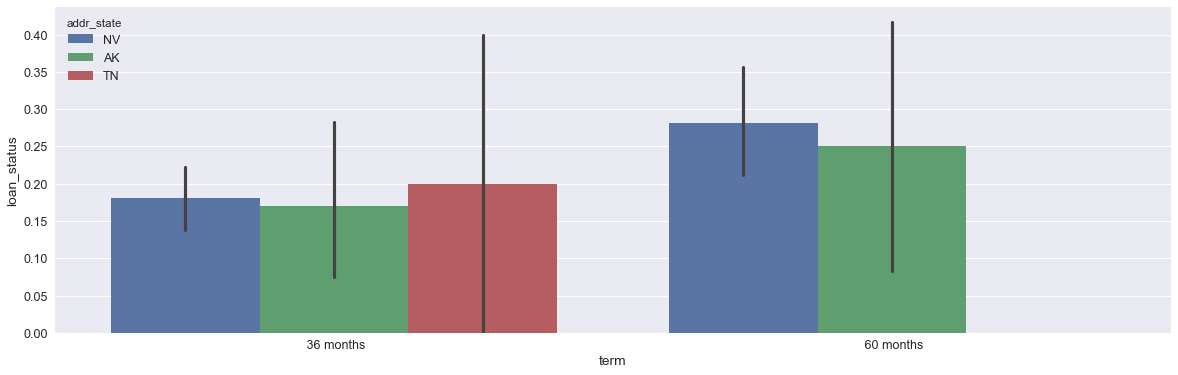

In [321]:
#Draw the barplot
plt.figure(figsize=(20, 6))
sns.barplot(x='term',y='loan_status',hue='addr_state',estimator=np.mean,data=loan_df[(loan_df.addr_state == 'NV')
                                                                                                | (loan_df.addr_state == 'TN')
                                                                                                 | (loan_df.addr_state == 'AK')])

#### 36 Months loan has most defaulters in 'TN', followed by 'NV'
#### 60 Months loan has most defaulters in 'NV', followed by 'AK'

In [322]:
#Bivariate analysis of term and inq_last_6mths against loan_status
loan_df.pivot_table(values='loan_status', index=['term','inq_last_6mths'], aggfunc='mean').sort_values(
                                                                by=['term','loan_status'], ascending=False)


loan_status
term       inq_last_6mths             
 60 months 7                      0.30
           5                      0.30
           6                      0.29
           3                      0.26
           2                      0.25
           1                      0.24
           0                      0.20
           4                      0.17
           8                      0.12
 36 months 7                      0.26
           6                      0.24
           8                      0.20
           3                      0.17
           5                      0.12
           4                      0.12
           1                      0.12
           2                      0.11
           0                      0.09

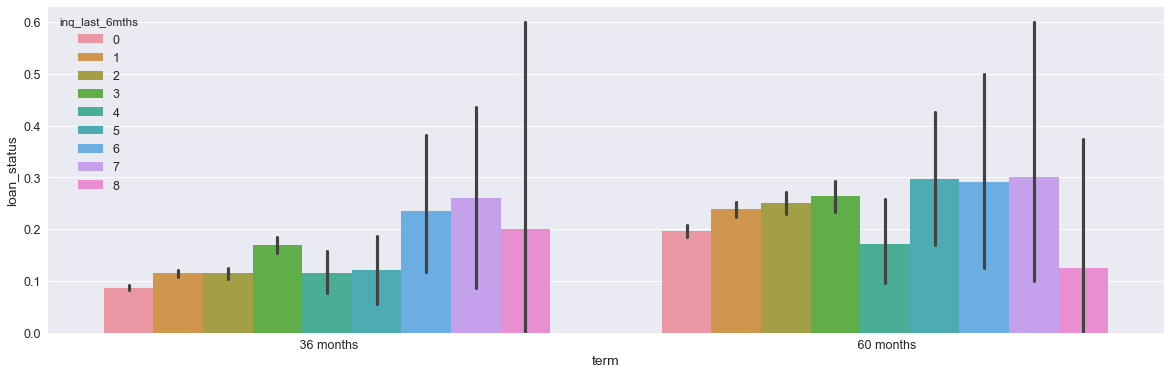

In [323]:
#Draw the barplot
plt.figure(figsize=(20, 6))
sns.barplot(x='term',y='loan_status',hue='inq_last_6mths',estimator=np.mean,data=loan_df)

#### 36 Months loan has most defaulters with 6+ credit inquiries in last 6 months
#### 60 Months loan has most defaulters with 5+ credit inquiries in last 6 months

In [324]:
#Bivariate analysis of grades and three states with the highest loan default rates against loan_status
loan_df[(loan_df.addr_state == 'NV')| (loan_df.addr_state == 'TN')| (loan_df.addr_state == 'AK')].pivot_table(
                                values='loan_status', index=['grade','addr_state'], aggfunc='mean').sort_values(
                                                                by=['grade','loan_status'], ascending=False)


loan_status
grade addr_state             
G     AK                 0.00
      NV                 0.00
F     AK                 0.50
      NV                 0.19
E     NV                 0.47
      AK                 0.33
D     AK                 0.43
      NV                 0.39
      TN                 0.00
C     AK                 0.33
      TN                 0.33
      NV                 0.18
B     TN                 0.25
      NV                 0.19
      AK                 0.04
A     AK                 0.06
      NV                 0.05
      TN                 0.00

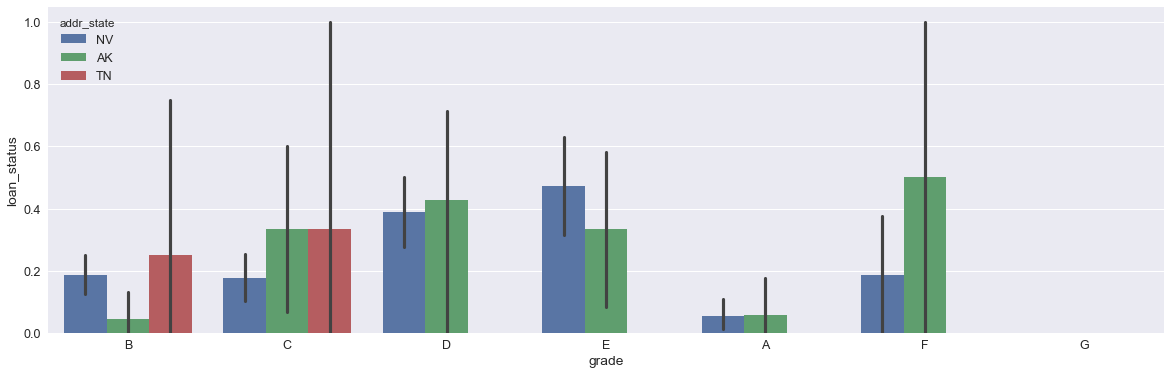

In [325]:
plt.figure(figsize=(20, 6))
sns.barplot(x='grade',y='loan_status',hue='addr_state',estimator=np.mean,data=loan_df[(loan_df.addr_state == 'NV')
                                                                                                | (loan_df.addr_state == 'TN')
                                                                                                 | (loan_df.addr_state == 'AK')])

#### Grade G loan has no defaulters in these three states.
#### Grade F loan has most defaulters in 'AK.
#### Grade E has most defaulters in 'NV'

In [326]:
#Bivariate analysis of three states with the highest loan default rates and purpose against loan_status
loan_df[(loan_df.addr_state == 'NV')| (loan_df.addr_state == 'TN')| (loan_df.addr_state == 'AK')].pivot_table(
                                values='loan_status', index=['addr_state','purpose'], aggfunc='mean').sort_values(
                                                                by=['addr_state','loan_status'], ascending=False)

loan_status
addr_state purpose                        
TN         credit_card                0.33
           debt_consolidation         0.33
           educational                0.00
           major_purchase             0.00
           other                      0.00
           small_business             0.00
NV         house                      0.38
           educational                0.33
           medical                    0.33
           vacation                   0.29
           small_business             0.27
           other                      0.25
           credit_card                0.23
           debt_consolidation         0.21
           home_improvement           0.17
           car                        0.12
           major_purchase             0.11
           moving                     0.00
           renewable_energy           0.00
           wedding                    0.00
AK         vacation                   1.00
           medical                    0.33
           credit_card                0.27
           small_business             0.22
           debt_consolidation         0.21
           home_improvement           0.10
           major_purchase             0.00
           other                      0.00
           wedding                    0.00

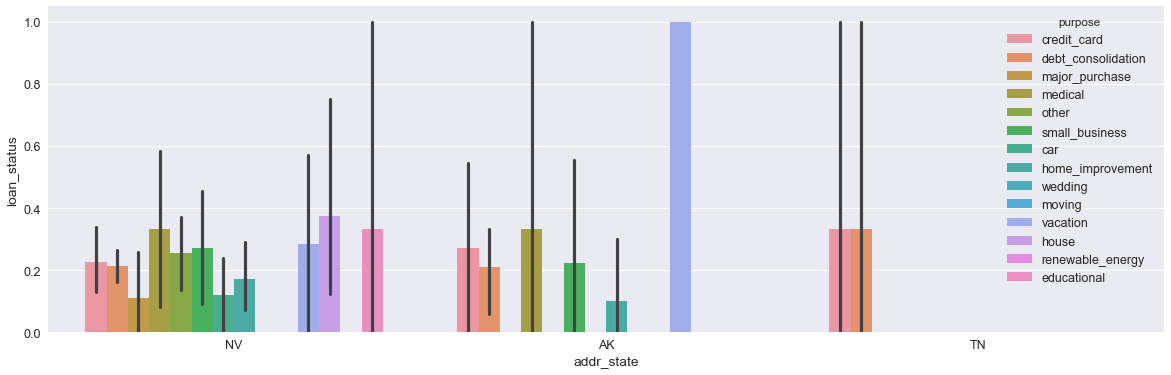

In [327]:

plt.figure(figsize=(20, 6))
sns.barplot(x='addr_state',y='loan_status',hue='purpose',estimator=np.mean,data=loan_df[(loan_df.addr_state == 'NV')
                                                                                                | (loan_df.addr_state == 'TN')
                                                                                                 | (loan_df.addr_state == 'AK')])

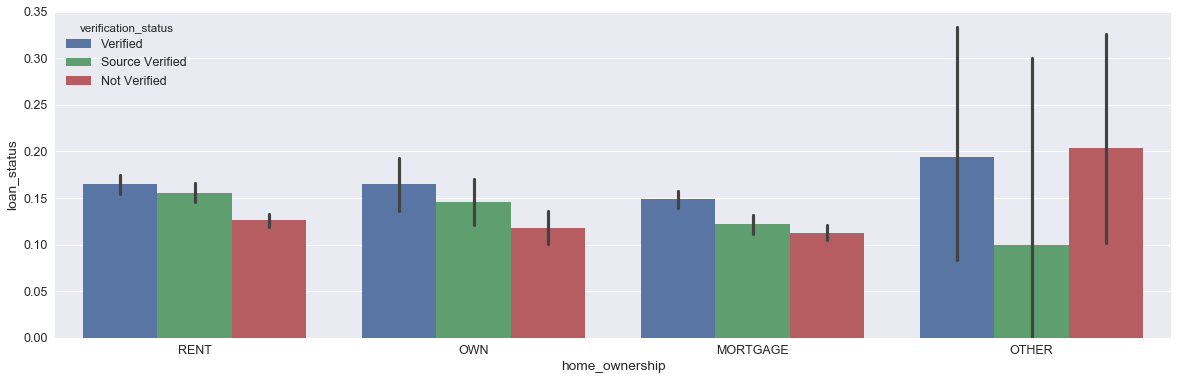

In [328]:
#Draw the barplot
plt.figure(figsize=(20, 6))
sns.barplot(x='home_ownership',y='loan_status',hue='verification_status',estimator=np.mean,data=loan_df)

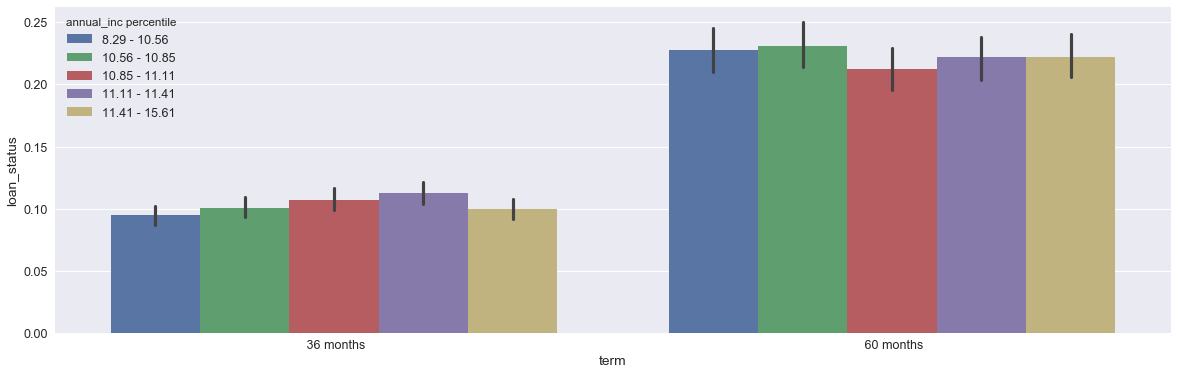

In [329]:
#Categorize annual_inc into 5 quantiles and compare it along with term against loan_status
col = "annual_inc"
minimum = round(min(loan_df[col]),2)
p1 = np.percentile(loan_df[col],20).round(2)
p2 = np.percentile(loan_df[col],40).round(2)
p3 = np.percentile(loan_df[col],60).round(2)
p4 = np.percentile(loan_df[col],80).round(2)
maximum = round(max(loan_df[col]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col][i] >= minimum and loan_df[col][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col][i] > p1 and loan_df[col][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col][i] > p2 and loan_df[col][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col][i] > p3 and loan_df[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]

name = col+" "+"percentile"        
loan_df[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x='term',y='loan_status',hue=name,hue_order=valuelist,estimator=np.mean,data=loan_df)


#### 36 Months loan has most defaulters in the 4th annual_inc percentile, followed by the 3rd percentile.
#### 60 Months loan has most defaulters in the 2nd annual_inc percentile, followed by the 1st percentile.

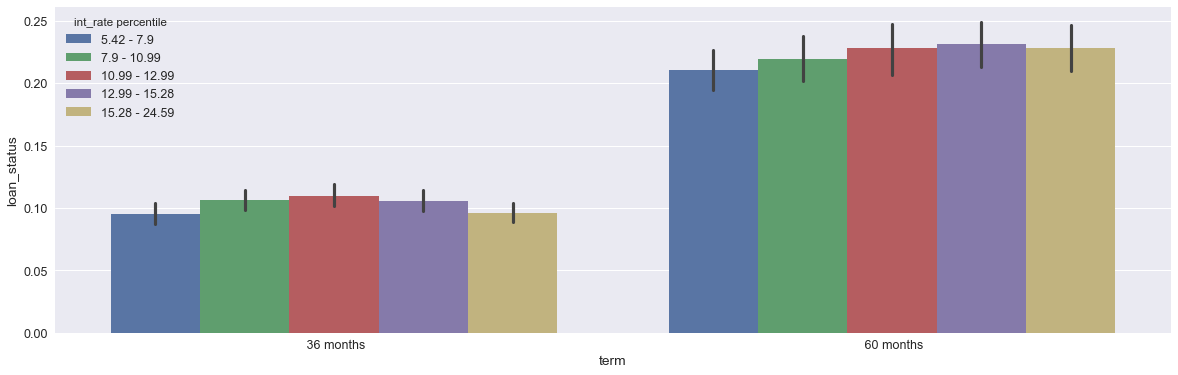

In [330]:
#Categorize int_rate into 5 quantiles and compare it along with term against loan_status
col = "int_rate"
minimum = min(loan_df[col])
p1 = np.percentile(loan_df[col],20)
p2 = np.percentile(loan_df[col],40)
p3 = np.percentile(loan_df[col],60)
p4 = np.percentile(loan_df[col],80)
maximum = max(loan_df[col])
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col][i] >= minimum and loan_df[col][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col][i] > p1 and loan_df[col][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col][i] > p2 and loan_df[col][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col][i] > p3 and loan_df[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name = col+" "+"percentile"
loan_df[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x='term',y='loan_status',hue=name,hue_order=valuelist,estimator=np.mean,data=loan_df)


#### 36 Months loan has most defaulters in the 3rd int_rate percentile, followed by the 4th percentile.
#### 60 Months loan has most defaulters in the 4th int_rate percentile, followed by the 5th and 3rd percentiles.


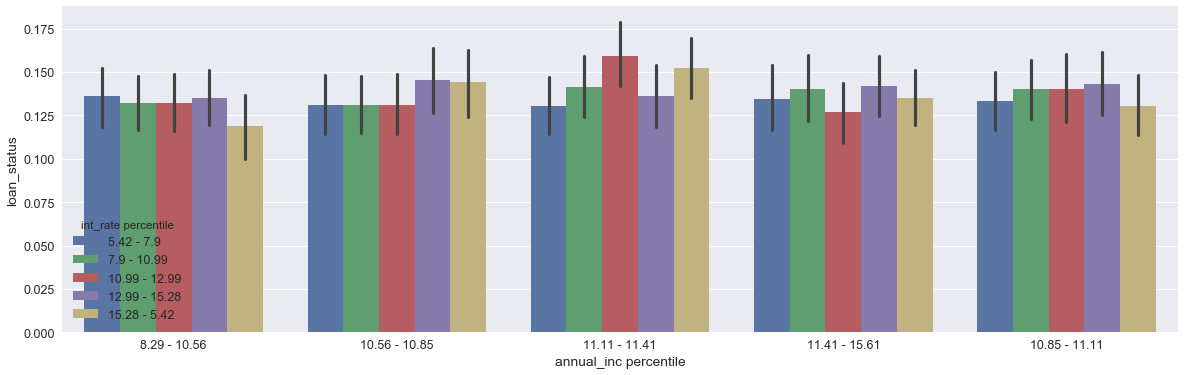

In [331]:
#Categorize annual_inc and int_rate into 5 quantiles each and compare them against loan_status
col1 = "annual_inc"
minimum = round(min(loan_df[col1]),2)
p1 = np.percentile(loan_df[col1],20).round(2)
p2 = np.percentile(loan_df[col1],40).round(2)
p3 = np.percentile(loan_df[col1],60).round(2)
p4 = np.percentile(loan_df[col1],80).round(2)
maximum = round(max(loan_df[col1]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col1][i] >= minimum and loan_df[col1][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col1][i] > p1 and loan_df[col1][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col1][i] > p2 and loan_df[col1][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col1][i] > p3 and loan_df[col1][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name1 = col1+" "+"percentile"
loan_df[name1] = pd.Series(quintile)

col2 = "int_rate"
minimum = round(min(loan_df[col2]),2)
p1 = np.percentile(loan_df[col2],20).round(2)
p2 = np.percentile(loan_df[col2],40).round(2)
p3 = np.percentile(loan_df[col2],60).round(2)
p4 = np.percentile(loan_df[col2],80).round(2)
maximum = round(max(loan_df[col2]),2)
values = [minimum,p1,p2,p3,p4,minimum]
valuelist1 = []
for x in range(len(values)-1):
    valuelist1 += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col2][i] >= minimum and loan_df[col2][i] <= p1:
        quintile += [valuelist1[0]]
    elif loan_df[col2][i] > p1 and loan_df[col2][i] <= p2:
        quintile += [valuelist1[1]]
    elif loan_df[col2][i] > p2 and loan_df[col2][i] <= p3:
        quintile += [valuelist1[2]]
    elif loan_df[col2][i] > p3 and loan_df[col2][i] <= p4:
        quintile += [valuelist1[3]]
    else:
        quintile += [valuelist1[4]]
name2 = col2+" "+"percentile"
loan_df[name2] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x=name1,y='loan_status',hue=name2,hue_order=valuelist1,estimator=np.mean,data=loan_df)


#### We can see generally higher interest rates across all annual_inc percentiles result in higher loan default rates

In [332]:
categorical_variables

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'addr_state'],
      dtype='object')

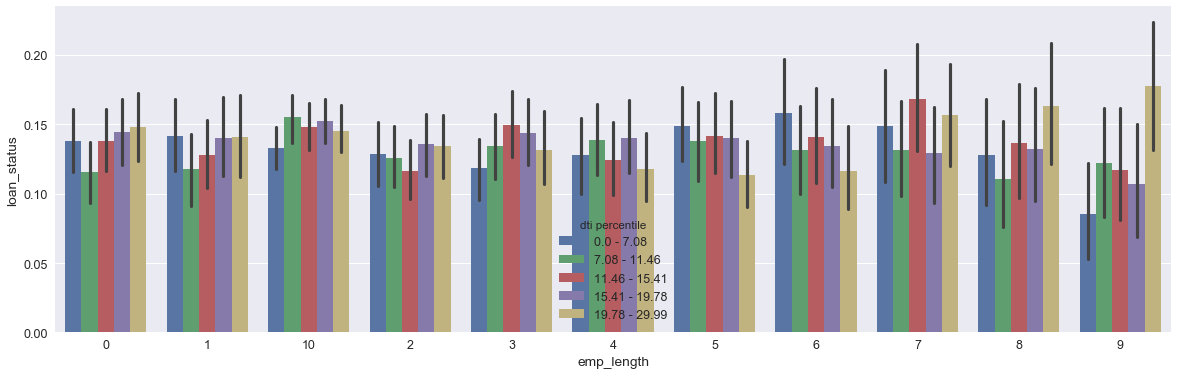

In [333]:
#Categorize dti into 5 quantilesand compare it along with emp_length against loan_status
col = "dti"
minimum = round(min(loan_df[col]),2)
p1 = np.percentile(loan_df[col],20).round(2)
p2 = np.percentile(loan_df[col],40).round(2)
p3 = np.percentile(loan_df[col],60).round(2)
p4 = np.percentile(loan_df[col],80).round(2)
maximum = round(max(loan_df[col]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col][i] >= minimum and loan_df[col][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col][i] > p1 and loan_df[col][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col][i] > p2 and loan_df[col][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col][i] > p3 and loan_df[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name = col+" "+"percentile"
loan_df[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x='emp_length',y='loan_status',hue=name,hue_order=valuelist,estimator=np.mean,data=loan_df)


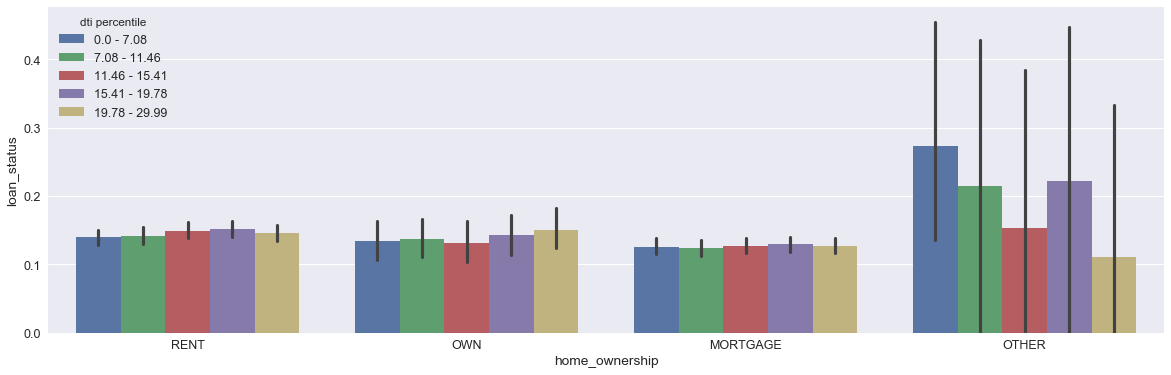

In [341]:
#Categorize dti into 5 quantiles and compare it along with home_ownership against loan_status
col = "dti"
minimum = round(min(loan_df[col]),2)
p1 = np.percentile(loan_df[col],20).round(2)
p2 = np.percentile(loan_df[col],40).round(2)
p3 = np.percentile(loan_df[col],60).round(2)
p4 = np.percentile(loan_df[col],80).round(2)
maximum = round(max(loan_df[col]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col][i] >= minimum and loan_df[col][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col][i] > p1 and loan_df[col][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col][i] > p2 and loan_df[col][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col][i] > p3 and loan_df[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name = col+" "+"percentile"
loan_df[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x='home_ownership',y='loan_status',hue=name,hue_order=valuelist,estimator=np.mean,data=loan_df)


In [337]:
numerical_variables

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'issue_d', 'loan_status',
       'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'credit_line_age_on_issue_dt', 'account_age'],
      dtype='object')

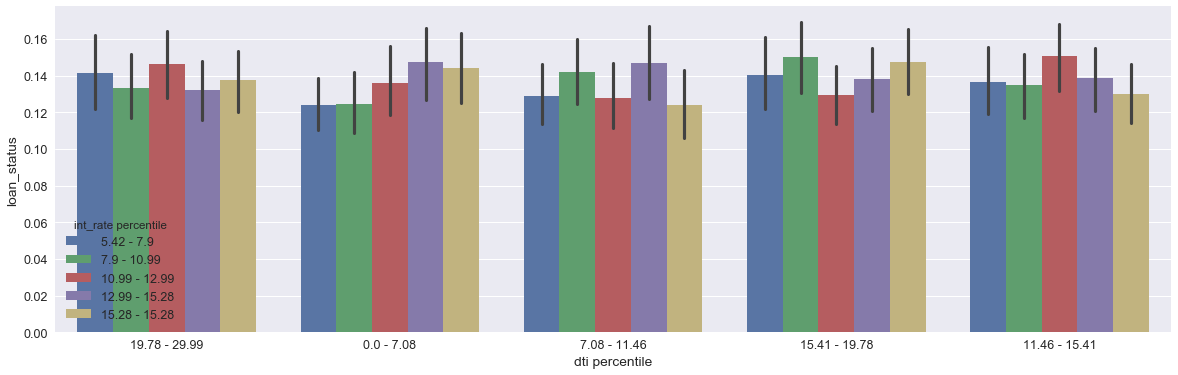

In [342]:
#Categorize dti and int_rate into 5 quantiles each and compare them against loan_status
col1 = "dti"
minimum = round(min(loan_df[col1]),2)
p1 = np.percentile(loan_df[col1],20).round(2)
p2 = np.percentile(loan_df[col1],40).round(2)
p3 = np.percentile(loan_df[col1],60).round(2)
p4 = np.percentile(loan_df[col1],80).round(2)
maximum = round(max(loan_df[col1]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col1][i] >= minimum and loan_df[col1][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col1][i] > p1 and loan_df[col1][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col1][i] > p2 and loan_df[col1][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col1][i] > p3 and loan_df[col1][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name1 = col1+" "+"percentile"
loan_df[name1] = pd.Series(quintile)

col2 = "int_rate"
minimum = round(min(loan_df[col2]),2)
p1 = np.percentile(loan_df[col2],20).round(2)
p2 = np.percentile(loan_df[col2],40).round(2)
p3 = np.percentile(loan_df[col2],60).round(2)
p4 = np.percentile(loan_df[col2],80).round(2)
maximum = round(max(loan_df[col2]),2)
values = [minimum,p1,p2,p3,p4,p4]
valuelist1 = []
for x in range(len(values)-1):
    valuelist1 += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col2][i] >= minimum and loan_df[col2][i] <= p1:
        quintile += [valuelist1[0]]
    elif loan_df[col2][i] > p1 and loan_df[col2][i] <= p2:
        quintile += [valuelist1[1]]
    elif loan_df[col2][i] > p2 and loan_df[col2][i] <= p3:
        quintile += [valuelist1[2]]
    elif loan_df[col2][i] > p3 and loan_df[col2][i] <= p4:
        quintile += [valuelist1[3]]
    else:
        quintile += [valuelist1[4]]
name2 = col2+" "+"percentile"
loan_df[name2] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x=name1,y='loan_status',hue=name2,hue_order=valuelist1,estimator=np.mean,data=loan_df)


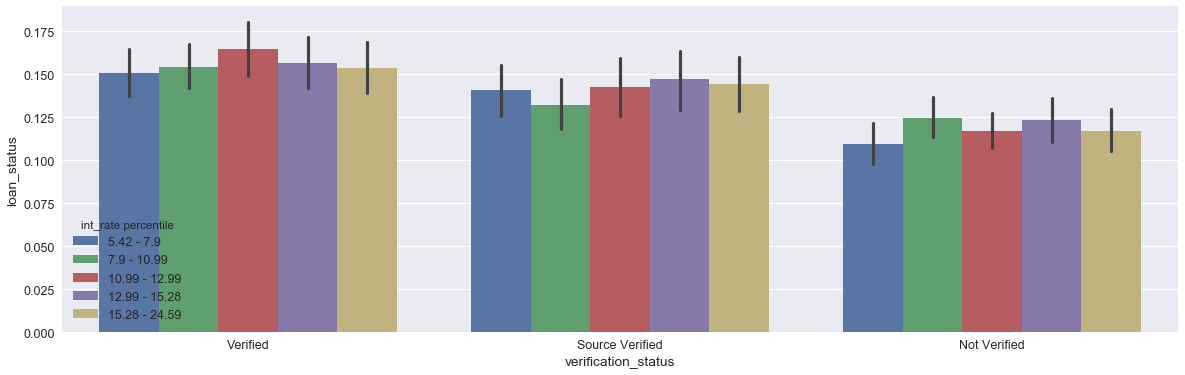

In [344]:
#Categorize int_rate into 5 quantiles and compare it along with verification_status against loan_status
col = "int_rate"
minimum = round(min(loan_df[col]),2)
p1 = np.percentile(loan_df[col],20).round(2)
p2 = np.percentile(loan_df[col],40).round(2)
p3 = np.percentile(loan_df[col],60).round(2)
p4 = np.percentile(loan_df[col],80).round(2)
maximum = round(max(loan_df[col]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col][i] >= minimum and loan_df[col][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col][i] > p1 and loan_df[col][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col][i] > p2 and loan_df[col][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col][i] > p3 and loan_df[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name = col+" "+"percentile"
loan_df[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x='verification_status',y='loan_status',hue=name,hue_order=valuelist,estimator=np.mean,data=loan_df)


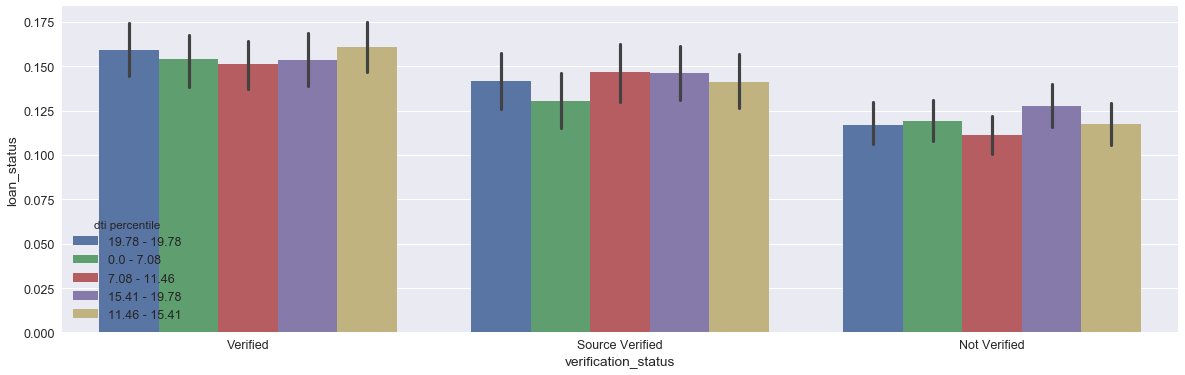

In [345]:
#Categorize dti into 5 quantiles and compare it along with verification_status against loan_status
col = "dti"
minimum = round(min(loan_df[col]),2)
p1 = np.percentile(loan_df[col],20).round(2)
p2 = np.percentile(loan_df[col],40).round(2)
p3 = np.percentile(loan_df[col],60).round(2)
p4 = np.percentile(loan_df[col],80).round(2)
maximum = round(max(loan_df[col]),2)
values = [minimum,p1,p2,p3,p4,p4]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col][i] >= minimum and loan_df[col][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col][i] > p1 and loan_df[col][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col][i] > p2 and loan_df[col][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col][i] > p3 and loan_df[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name = col+" "+"percentile"
loan_df[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x='verification_status',y='loan_status',hue=name,estimator=np.mean,data=loan_df)


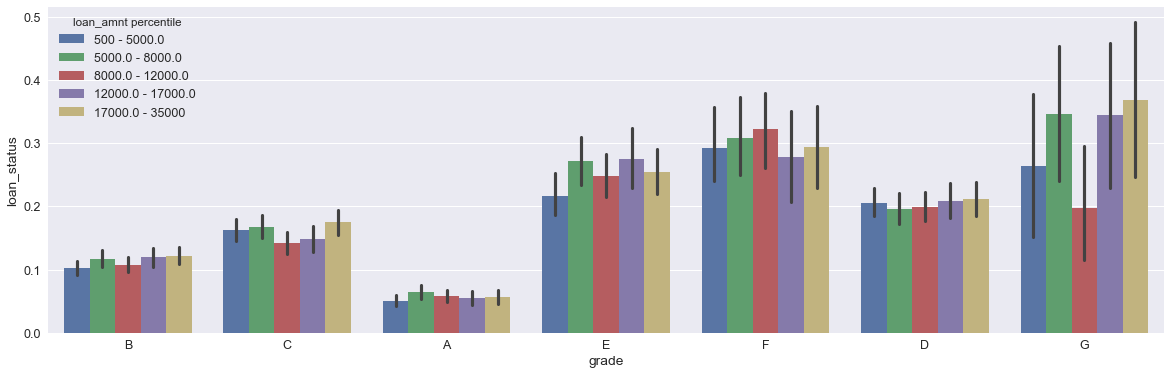

In [346]:
#Categorize loan_amnt into 5 quantiles and compare it along with grade against loan_status
col = "loan_amnt"
minimum = round(min(loan_df[col]),2)
p1 = np.percentile(loan_df[col],20).round(2)
p2 = np.percentile(loan_df[col],40).round(2)
p3 = np.percentile(loan_df[col],60).round(2)
p4 = np.percentile(loan_df[col],80).round(2)
maximum = round(max(loan_df[col]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col][i] >= minimum and loan_df[col][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col][i] > p1 and loan_df[col][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col][i] > p2 and loan_df[col][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col][i] > p3 and loan_df[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name = col+" "+"percentile"
loan_df[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x='grade',y='loan_status',hue=name,hue_order=valuelist,estimator=np.mean,data=loan_df)


In [347]:
categorical_variables

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'addr_state'],
      dtype='object')

In [348]:
numerical_variables

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'issue_d', 'loan_status',
       'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'credit_line_age_on_issue_dt', 'account_age'],
      dtype='object')

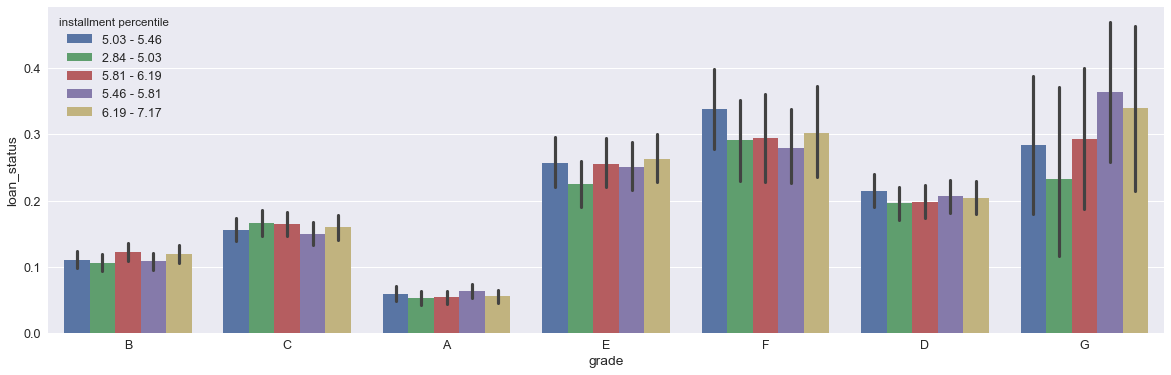

In [349]:
#Categorize installment into 5 quantiles and compare it along with grade against loan_status
col = "installment"
minimum = round(min(loan_df[col]),2)
p1 = np.percentile(loan_df[col],20).round(2)
p2 = np.percentile(loan_df[col],40).round(2)
p3 = np.percentile(loan_df[col],60).round(2)
p4 = np.percentile(loan_df[col],80).round(2)
maximum = round(max(loan_df[col]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col][i] >= minimum and loan_df[col][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col][i] > p1 and loan_df[col][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col][i] > p2 and loan_df[col][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col][i] > p3 and loan_df[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name = col+" "+"percentile"
loan_df[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x='grade',y='loan_status',hue=name,estimator=np.mean,data=loan_df)


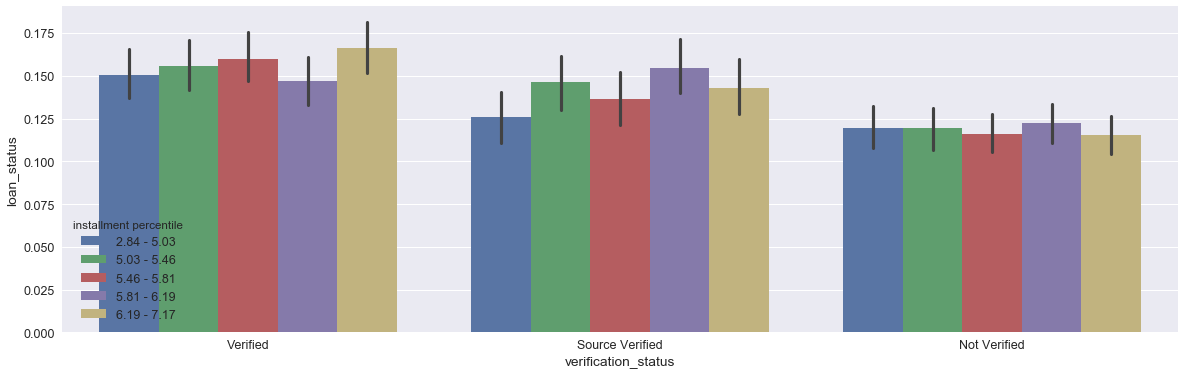

In [350]:
#Categorize installment into 5 quantiles and compare it along with grade against loan_status
col = "installment"
minimum = round(min(loan_df[col]),2)
p1 = np.percentile(loan_df[col],20).round(2)
p2 = np.percentile(loan_df[col],40).round(2)
p3 = np.percentile(loan_df[col],60).round(2)
p4 = np.percentile(loan_df[col],80).round(2)
maximum = round(max(loan_df[col]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col][i] >= minimum and loan_df[col][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col][i] > p1 and loan_df[col][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col][i] > p2 and loan_df[col][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col][i] > p3 and loan_df[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name = col+" "+"percentile"
loan_df[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x='verification_status',y='loan_status',hue=name,hue_order=valuelist,estimator=np.mean,data=loan_df)


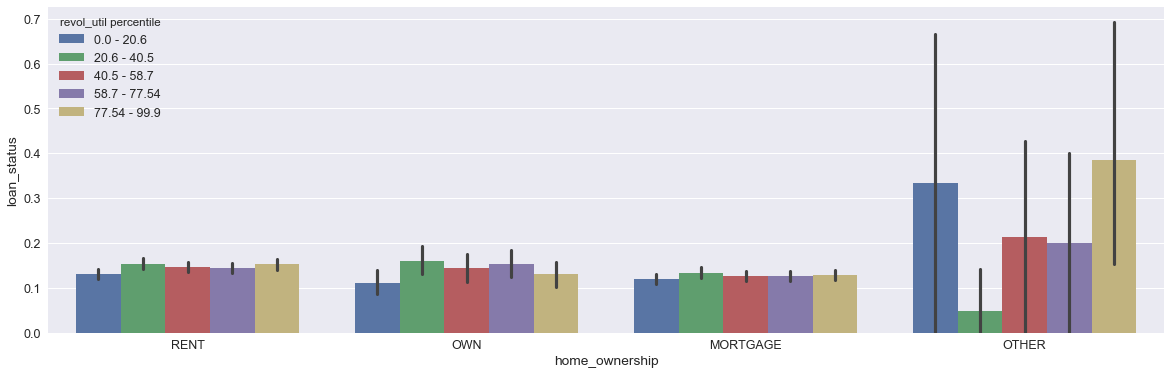

In [351]:
#Categorize revol_util into 5 quantiles and compare it along with home_ownership against loan_status
col = "revol_util"
minimum = round(min(loan_df[col]),2)
p1 = np.percentile(loan_df[col],20).round(2)
p2 = np.percentile(loan_df[col],40).round(2)
p3 = np.percentile(loan_df[col],60).round(2)
p4 = np.percentile(loan_df[col],80).round(2)
maximum = round(max(loan_df[col]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col][i] >= minimum and loan_df[col][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col][i] > p1 and loan_df[col][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col][i] > p2 and loan_df[col][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col][i] > p3 and loan_df[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name = col+" "+"percentile"
loan_df[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x='home_ownership',y='loan_status',hue=name,hue_order=valuelist,estimator=np.mean,data=loan_df)


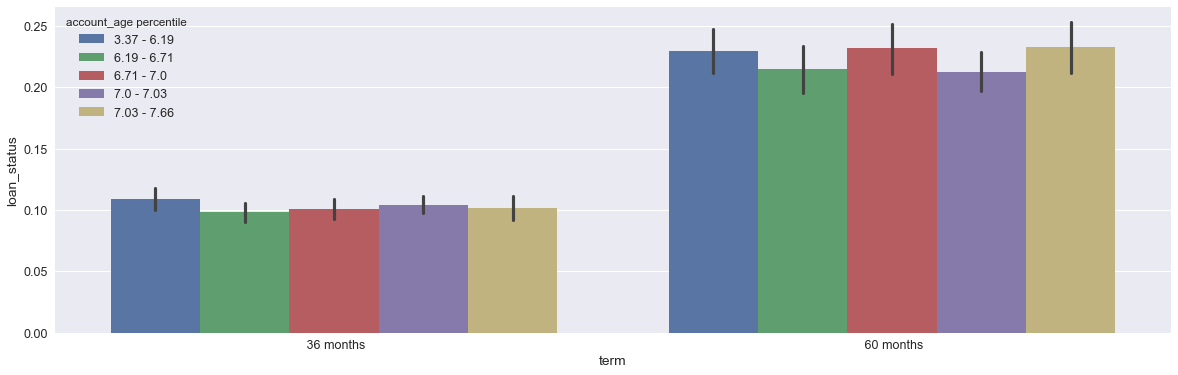

In [182]:
col = "account_age"
minimum = round(min(loan_df[col]),2)
p1 = np.percentile(loan_df[col],20).round(2)
p2 = np.percentile(loan_df[col],40).round(2)
p3 = np.percentile(loan_df[col],60).round(2)
p4 = np.percentile(loan_df[col],80).round(2)
maximum = round(max(loan_df[col]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col][i] >= minimum and loan_df[col][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col][i] > p1 and loan_df[col][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col][i] > p2 and loan_df[col][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col][i] > p3 and loan_df[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name = col+" "+"percentile"
loan_df[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x='term',y='loan_status',hue=name,hue_order=valuelist,estimator=np.mean,data=loan_df)


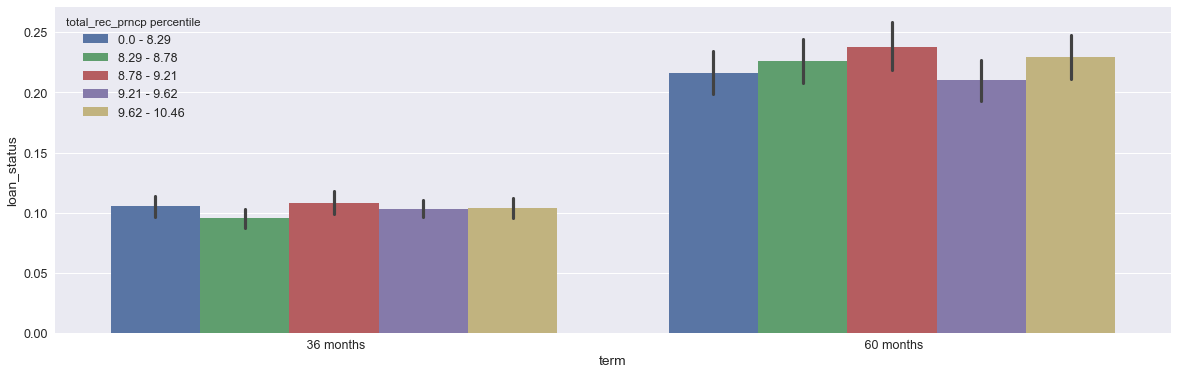

In [352]:
#Categorize total_rec_prncp into 5 quantiles and compare it along with term against loan_status
col = "total_rec_prncp"
minimum = round(min(loan_df[col]),2)
p1 = np.percentile(loan_df[col],20).round(2)
p2 = np.percentile(loan_df[col],40).round(2)
p3 = np.percentile(loan_df[col],60).round(2)
p4 = np.percentile(loan_df[col],80).round(2)
maximum = round(max(loan_df[col]),2)
values = [minimum,p1,p2,p3,p4,maximum]
valuelist = []
for x in range(len(values)-1):
    valuelist += [str(values[x])+" - "+str(values[x+1])]


quintile = []
for i in list(loan_df.index):
    if loan_df[col][i] >= minimum and loan_df[col][i] <= p1:
        quintile += [valuelist[0]]
    elif loan_df[col][i] > p1 and loan_df[col][i] <= p2:
        quintile += [valuelist[1]]
    elif loan_df[col][i] > p2 and loan_df[col][i] <= p3:
        quintile += [valuelist[2]]
    elif loan_df[col][i] > p3 and loan_df[col][i] <= p4:
        quintile += [valuelist[3]]
    else:
        quintile += [valuelist[4]]
name = col+" "+"percentile"
loan_df[name] = pd.Series(quintile)

plt.figure(figsize=(20, 6))
sns.barplot(x='term',y='loan_status',hue=name,hue_order=valuelist,estimator=np.mean,data=loan_df)
